# EDA (PM10, PM2,5)

*alpha 1.0*

* PM10, PM2,5, O3, NO2, SO2, C6H6, CO - data from GIOŚ archive: https://powietrze.gios.gov.pl/pjp/archives
* Prediction will be based on weather (from last 24h and current measurments- forcast for predicting future pollutant values) - data from IMGW archive: https://dane.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/terminowe/synop/
* weather forcast / current params - https://openweathermap.org/api
* All pollutants are time series, 1 measure per hour
* time period used: last 4 years (2016, 2017, 2018, 2019)

## env

In [1]:
import os
import sys

import pandas as pd
pd.options.display.max_rows = 25
pd.options.display.max_columns = None
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# 2019

In [2]:
pd.read_excel('../data/gios/2019_PM10_1g.xlsx')

,Nr,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
0,Kod stacji,DsDusznikMOB,DsDzialoszyn,DsDziePilsud,DsJaworMOB,DsJelGorOgin,DsKlodzSzkol,DsLegAlRzecz,DsLubanMieszMOB,DsNowRudJezi,DsOlawZolnAK,DsWalbrzWyso,DsWrocWybCon,DsZabkPowWar,KpBydPlPozna,KpBydWarszaw,KpInowSolank,KpMogiNowMOB,KpToruDziewu,KpToruKaszow,KpToruWSikor,KpWloclKalis,KpWloclOkrze,LbBiaPodOrze,LbChelPolan,LbLubObywate,LbNaleczow,LbZamoHrubie,LdGajewUjWod,LdLodzCzerni,LdLodzGdansk,LdLodzJanPaw,LdPabiKonsta,LdPioTrKraPr,LdRadomsRoln,LdZgieMielcz,LuGorzKosGdy,LuNowaSolMOB,LuSulecDudka,LuWsKaziWiel,LuZarySzyman,LuZielKrotka,MpKrakAlKras,MpKrakBujaka,MpKrakBulwar,MpKrakDietla,MpKrakOsPias,MpKrakSwoszo,MpKrakWadow,MpKrakZloRog,MpNoSaczNadb,MpNoTargPSlo,MpSkawOsOgro,MpSuchaNiesz,MpTarBitStud,MpTarRoSitko,MpTrzebOsZWM,MpZakopaSien,MzKonJezMos,MzLegZegrzyn,MzMinMazKaziMOB,MzOtwoBrzozo,MzPiasPulask,MzPlocMiReja,MzRadTochter,MzSiedKonars,MzWarAlNiepo,MzWarBajkowa,MzWarChrosci,MzWarKondrat,MzWarTolstoj,MzWarWokalna,MzZyraRoosev,OpOlesSlowac,OpOpoleKoszy,OpPrudPodgor,OpZdziePiast,PdBialWarsza,PdBorsukowiz,PdLomSikorsk,PkDebiGrottg,PkHorZdrParkMOB,PkJarosPruch,PkJasloSikor,PkMielBierna,PkNiskoSzkla,PkPrzemGrunw,PkRymZdrPark,PkRzeszPilsu,PkRzeszRejta,PmGdaKacze02,PmGdaLeczk08,PmGdaPoWie01,PmGdaWyzwo03,PmGdyPoreb04,PmGdySzaf09N,PmKosTargo12,PmLebMalcz16,PmMalMicki15,PmSlupKniazi,PmSopBitPl06,SkKielTargow,SkMaloSlonec,SkNowiParkow,SkPolaRuszcz,SkSkarZielnaMOB,SkStaraZlota,SlBielKossak,SlCiesMickie,SlCzestoArmK,SlCzestoBacz,SlDabro1000L,SlGliwicMewy,SlKatoKossut,SlLublSzymal,SlRybniBorki,SlSosnoLubel,SlTychyTolst,SlUstronSana,SlWodzGalczy,SlZabSkloCur,SlZawGalczyn,SlZlotPotLes,SlZywieKoper,WmElbBazynsk,WmElkStadion,WmGoldJacwie,WmGoldUzdrowMOB,WmOlsPuszkin,WmOstrPilsud,WpBoroDrapal,WpKoniWyszyn,WpKozieosLes,WpPoznDabrow,WpPoznRatajeMOB,ZpKoszArKraj,ZpSzczAndr01,ZpSzczBudzWosMOB,ZpSzczecPrze,ZpSzczPils02
1,Wskaźnik,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10
2,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
3,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,u

In [3]:
pm10_2019 = pd.read_excel('../data/gios/2019_PM10_1g.xlsx', header=5, index_col=0)

In [4]:
pm10_2019

,DsDusznikMOB-PM10-1g,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJaworMOB-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsLegAlRzecz-PM10-1g,DsLubanMieszMOB-PM10-1g,DsNowRudJezi-PM10-1g,DsOlawZolnAK-PM10-1g,DsWalbrzWyso-PM10-1g,DsWrocWybCon-PM10-1g,DsZabkPowWar-PM10-1g,KpBydPlPozna-PM10-1g,KpBydWarszaw-PM10-1g,KpInowSolank-PM10-1g,KpMogiNowMOB-PM10-1g,KpToruDziewu-PM10-1g,KpToruKaszow-PM10-1g,KpToruWSikor-PM10-1g,KpWloclKalis-PM10-1g,KpWloclOkrze-PM10-1g,LbBiaPodOrze-PM10-1g,LbChelPolan-PM10-1g,LbLubObywate-PM10-1g,LbNaleczow-PM10-1g,LbZamoHrubie-PM10-1g,LdGajewUjWod-PM10-1g,LdLodzCzerni-PM10-1g,LdLodzGdansk-PM10-1g,LdLodzJanPaw-PM10-1g,LdPabiKonsta-PM10-1g,LdPioTrKraPr-PM10-1g,LdRadomsRoln-PM10-1g,LdZgieMielcz-PM10-1g,LuGorzKosGdy-PM10-1g,LuNowaSolMOB-PM10-1g,LuSulecDudka-PM10-1g,LuWsKaziWiel-PM10-1g,LuZarySzyman-PM10-1g,LuZielKrotka-PM10-1g,MpKrakAlKras-PM10-1g,MpKrakBujaka-PM10-1g,MpKrakBulwar-PM10-1g,MpKrakDietla-PM10-1g,MpKrakOsPias-PM10-1g,MpKrakSwoszo-PM10-1g,MpKrakWadow-PM10-1g,MpKrakZloRog-PM10-1g,MpNoSaczNadb-PM10-1g,MpNoTargPSlo-PM10-1g,MpSkawOsOgro-PM10-1g,MpSuchaNiesz-PM10-1g,MpTarBitStud-PM10-1g,MpTarRoSitko-PM10-1g,MpTrzebOsZWM-PM10-1g,MpZakopaSien-PM10-1g,MzKonJezMos-PM10-1g,MzLegZegrzyn-PM10-1g,MzMinMazKaziMOB-PM10-1g,MzOtwoBrzozo-PM10-1g,MzPiasPulask-PM10-1g,MzPlocMiReja-PM10-1g,MzRadTochter-PM10-1g,MzSiedKonars-PM10-1g,MzWarAlNiepo-PM10-1g,MzWarBajkowa-PM10-1g,MzWarChrosci-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g,MzZyraRoosev-PM10-1g,OpOlesSlowac-PM10-1g,OpOpoleKoszy-PM10-1g,OpPrudPodgor-PM10-1g,OpZdziePiast-PM10-1g,PdBialWarsza-PM10-1g,PdBorsukowiz-PM10-1g,PdLomSikorsk-PM10-1g,PkDebiGrottg-PM10-1g,PkHorZdrParkMOB-PM10-1g,PkJarosPruch-PM10-1g,PkJasloSikor-PM10-1g,PkMielBierna-PM10-1g,PkNiskoSzkla-PM10-1g,PkPrzemGrunw-PM10-1g,PkRymZdrPark-PM10-1g,PkRzeszPilsu-PM10-1g,PkRzeszRejta-PM10-1g,PmGdaKacze02-PM10-1g,PmGdaLeczk08-PM10-1g,PmGdaPoWie01-PM10-1g,PmGdaWyzwo03-PM10-1g,PmGdyPoreb04-PM10-1g,PmGdySzaf09N-PM10-1g,PmKosTargo12-PM10-1g,PmLebMalcz16-PM10-1g,PmMalMicki15-PM10-1g,PmSlupKniazi-PM10-1g,PmSopBitPl06-PM10-1g,SkKielTargow-PM10-1g,SkMaloSlonec-PM10-1g,SkNowiParkow-PM10-1g,SkPolaRuszcz-PM10-1g,SkSkarZielnaMOB-PM10-1g,SkStaraZlota-PM10-1g,SlBielKossak-PM10-1g,SlCiesMickie-PM10-1g,SlCzestoArmK-PM10-1g,SlCzestoBacz-PM10-1g,SlDabro1000L-PM10-1g,SlGliwicMewy-PM10-1g,SlKatoKossut-PM10-1g,SlLublSzymal-PM10-1g,SlRybniBorki-PM10-1g,SlSosnoLubel-PM10-1g,SlTychyTolst-PM10-1g,SlUstronSana-PM10-1g,SlWodzGalczy-PM10-1g,SlZabSkloCur-PM10-1g,SlZawGalczyn-PM10-1g,SlZlotPotLes-PM10-1g,SlZywieKoper-PM10-1g,WmElbBazynsk-PM10-1g,WmElkStadion-PM10-1g,WmGoldJacwie-PM10-1g,WmGoldUzdrowMOB-PM10-1g,WmOlsPuszkin-PM10-1g,WmOstrPilsud-PM10-1g,WpBoroDrapal-PM10-1g,WpKoniWyszyn-PM10-1g,WpKozieosLes-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznRatajeMOB-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczBudzWosMOB-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczPils02-PM10-1g
Kod stanowiska,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,35.21080,16.68570,245.9290,55.28140,125.3260,306.4300,65.3853,31.1785,NaN,39.7100,35.29540,115.5170,46.40820,94.5,114.2649,15.1050,NaN,86.496,NaN,26.7,NaN,53.753,NaN,14.0,65.3200,NaN,99.7014,38.0,70.0,162.294,35.0,53.0,42.0,37.0,69.040,57.0311,76.3473,17.4035,58.2072,152.5210,36.9684,88.2185,139.7900,120.0570,73.4495,161.0530,NaN,83.6841,77.8355,63.7522,132.9710,NaN,72.2746,67.4316,73.1073,113.0970,138.1760,39.357284,48.155374,NaN,39.772007,NaN,38.098950,40.389135,69.48,73.077490,59.870348,62.6603,54.113472,NaN,46.527342,48.724218,24.2266,38.0846,NaN,50.4629,43.8,8.5,76.0,45.1,NaN,36.6,23.4,69.4362,36.4,50.4,19.3,35.9147,31.1,23.78530,25.73020,76.30860,16.39110,34.6761,22.19170,56.37780,69.17820,25.67840,NaN,24.03820,50.00,31.72,25.80,18.78,NaN,32.69112,169.5440,62.6338,83.2158,58.4966,119.2360,130.7090,84.9443,60.1095,63.3477,55.9938,54.9406,20.5867,175.2180,151.9340,NaN,26.643

In [5]:
pm10_2019.shape

(8760, 139)

In [6]:
24*365

8760

In [7]:
pm10_2019.index.name ='Data pomiaru'

In [8]:
pm10_2019 = pm10_2019.asfreq('H')

### how to filter time series?

In [9]:
pm10_2019['2019-01-01']

,DsDusznikMOB-PM10-1g,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJaworMOB-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsLegAlRzecz-PM10-1g,DsLubanMieszMOB-PM10-1g,DsNowRudJezi-PM10-1g,DsOlawZolnAK-PM10-1g,DsWalbrzWyso-PM10-1g,DsWrocWybCon-PM10-1g,DsZabkPowWar-PM10-1g,KpBydPlPozna-PM10-1g,KpBydWarszaw-PM10-1g,KpInowSolank-PM10-1g,KpMogiNowMOB-PM10-1g,KpToruDziewu-PM10-1g,KpToruKaszow-PM10-1g,KpToruWSikor-PM10-1g,KpWloclKalis-PM10-1g,KpWloclOkrze-PM10-1g,LbBiaPodOrze-PM10-1g,LbChelPolan-PM10-1g,LbLubObywate-PM10-1g,LbNaleczow-PM10-1g,LbZamoHrubie-PM10-1g,LdGajewUjWod-PM10-1g,LdLodzCzerni-PM10-1g,LdLodzGdansk-PM10-1g,LdLodzJanPaw-PM10-1g,LdPabiKonsta-PM10-1g,LdPioTrKraPr-PM10-1g,LdRadomsRoln-PM10-1g,LdZgieMielcz-PM10-1g,LuGorzKosGdy-PM10-1g,LuNowaSolMOB-PM10-1g,LuSulecDudka-PM10-1g,LuWsKaziWiel-PM10-1g,LuZarySzyman-PM10-1g,LuZielKrotka-PM10-1g,MpKrakAlKras-PM10-1g,MpKrakBujaka-PM10-1g,MpKrakBulwar-PM10-1g,MpKrakDietla-PM10-1g,MpKrakOsPias-PM10-1g,MpKrakSwoszo-PM10-1g,MpKrakWadow-PM10-1g,MpKrakZloRog-PM10-1g,MpNoSaczNadb-PM10-1g,MpNoTargPSlo-PM10-1g,MpSkawOsOgro-PM10-1g,MpSuchaNiesz-PM10-1g,MpTarBitStud-PM10-1g,MpTarRoSitko-PM10-1g,MpTrzebOsZWM-PM10-1g,MpZakopaSien-PM10-1g,MzKonJezMos-PM10-1g,MzLegZegrzyn-PM10-1g,MzMinMazKaziMOB-PM10-1g,MzOtwoBrzozo-PM10-1g,MzPiasPulask-PM10-1g,MzPlocMiReja-PM10-1g,MzRadTochter-PM10-1g,MzSiedKonars-PM10-1g,MzWarAlNiepo-PM10-1g,MzWarBajkowa-PM10-1g,MzWarChrosci-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g,MzZyraRoosev-PM10-1g,OpOlesSlowac-PM10-1g,OpOpoleKoszy-PM10-1g,OpPrudPodgor-PM10-1g,OpZdziePiast-PM10-1g,PdBialWarsza-PM10-1g,PdBorsukowiz-PM10-1g,PdLomSikorsk-PM10-1g,PkDebiGrottg-PM10-1g,PkHorZdrParkMOB-PM10-1g,PkJarosPruch-PM10-1g,PkJasloSikor-PM10-1g,PkMielBierna-PM10-1g,PkNiskoSzkla-PM10-1g,PkPrzemGrunw-PM10-1g,PkRymZdrPark-PM10-1g,PkRzeszPilsu-PM10-1g,PkRzeszRejta-PM10-1g,PmGdaKacze02-PM10-1g,PmGdaLeczk08-PM10-1g,PmGdaPoWie01-PM10-1g,PmGdaWyzwo03-PM10-1g,PmGdyPoreb04-PM10-1g,PmGdySzaf09N-PM10-1g,PmKosTargo12-PM10-1g,PmLebMalcz16-PM10-1g,PmMalMicki15-PM10-1g,PmSlupKniazi-PM10-1g,PmSopBitPl06-PM10-1g,SkKielTargow-PM10-1g,SkMaloSlonec-PM10-1g,SkNowiParkow-PM10-1g,SkPolaRuszcz-PM10-1g,SkSkarZielnaMOB-PM10-1g,SkStaraZlota-PM10-1g,SlBielKossak-PM10-1g,SlCiesMickie-PM10-1g,SlCzestoArmK-PM10-1g,SlCzestoBacz-PM10-1g,SlDabro1000L-PM10-1g,SlGliwicMewy-PM10-1g,SlKatoKossut-PM10-1g,SlLublSzymal-PM10-1g,SlRybniBorki-PM10-1g,SlSosnoLubel-PM10-1g,SlTychyTolst-PM10-1g,SlUstronSana-PM10-1g,SlWodzGalczy-PM10-1g,SlZabSkloCur-PM10-1g,SlZawGalczyn-PM10-1g,SlZlotPotLes-PM10-1g,SlZywieKoper-PM10-1g,WmElbBazynsk-PM10-1g,WmElkStadion-PM10-1g,WmGoldJacwie-PM10-1g,WmGoldUzdrowMOB-PM10-1g,WmOlsPuszkin-PM10-1g,WmOstrPilsud-PM10-1g,WpBoroDrapal-PM10-1g,WpKoniWyszyn-PM10-1g,WpKozieosLes-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznRatajeMOB-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczBudzWosMOB-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczPils02-PM10-1g
Data pomiaru,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,35.21080,16.68570,245.92900,55.28140,125.32600,306.4300,65.38530,31.17850,NaN,39.710,35.29540,115.51700,46.40820,94.5,114.2649,15.1050,NaN,86.496,NaN,26.7,NaN,53.753,NaN,14.0,65.3200,NaN,99.7014,38.0,70.0,162.294,35.0,53.0,42.0,37.0,69.040,57.03110,76.34730,17.40350,58.20720,152.52100,36.9684,88.21850,139.79000,120.05700,73.44950,161.05300,NaN,83.68410,77.83550,63.75220,132.97100,NaN,72.27460,67.43160,73.1073,113.09700,138.17600,39.357284,48.155374,NaN,39.772007,NaN,38.098950,40.389135,69.48,73.077490,59.870348,62.6603,54.113472,NaN,46.527342,48.724218,24.22660,38.08460,NaN,50.46290,43.8,8.5,76.0,45.1,NaN,36.6,23.4,69.43620,36.4,50.4,19.3,35.9147,31.1,23.78530,25.73020,76.30860,16.39110,34.67610,22.19170,56.37780,69.17820,25.67840,NaN,24.03820,50.0,31.72,25.80,18.78,NaN,32.69112,169.54400,62.63380,83.21580,58.49660,119.23600,130.70900,84.9443,60.1095,63.3477,55.99380,54.94060,20.5

In [10]:
pm10_2019.iloc[pd.to_datetime(pm10_2019.index) == '2019-01-01 21:00:00'] # only one additional object

,DsDusznikMOB-PM10-1g,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJaworMOB-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsLegAlRzecz-PM10-1g,DsLubanMieszMOB-PM10-1g,DsNowRudJezi-PM10-1g,DsOlawZolnAK-PM10-1g,DsWalbrzWyso-PM10-1g,DsWrocWybCon-PM10-1g,DsZabkPowWar-PM10-1g,KpBydPlPozna-PM10-1g,KpBydWarszaw-PM10-1g,KpInowSolank-PM10-1g,KpMogiNowMOB-PM10-1g,KpToruDziewu-PM10-1g,KpToruKaszow-PM10-1g,KpToruWSikor-PM10-1g,KpWloclKalis-PM10-1g,KpWloclOkrze-PM10-1g,LbBiaPodOrze-PM10-1g,LbChelPolan-PM10-1g,LbLubObywate-PM10-1g,LbNaleczow-PM10-1g,LbZamoHrubie-PM10-1g,LdGajewUjWod-PM10-1g,LdLodzCzerni-PM10-1g,LdLodzGdansk-PM10-1g,LdLodzJanPaw-PM10-1g,LdPabiKonsta-PM10-1g,LdPioTrKraPr-PM10-1g,LdRadomsRoln-PM10-1g,LdZgieMielcz-PM10-1g,LuGorzKosGdy-PM10-1g,LuNowaSolMOB-PM10-1g,LuSulecDudka-PM10-1g,LuWsKaziWiel-PM10-1g,LuZarySzyman-PM10-1g,LuZielKrotka-PM10-1g,MpKrakAlKras-PM10-1g,MpKrakBujaka-PM10-1g,MpKrakBulwar-PM10-1g,MpKrakDietla-PM10-1g,MpKrakOsPias-PM10-1g,MpKrakSwoszo-PM10-1g,MpKrakWadow-PM10-1g,MpKrakZloRog-PM10-1g,MpNoSaczNadb-PM10-1g,MpNoTargPSlo-PM10-1g,MpSkawOsOgro-PM10-1g,MpSuchaNiesz-PM10-1g,MpTarBitStud-PM10-1g,MpTarRoSitko-PM10-1g,MpTrzebOsZWM-PM10-1g,MpZakopaSien-PM10-1g,MzKonJezMos-PM10-1g,MzLegZegrzyn-PM10-1g,MzMinMazKaziMOB-PM10-1g,MzOtwoBrzozo-PM10-1g,MzPiasPulask-PM10-1g,MzPlocMiReja-PM10-1g,MzRadTochter-PM10-1g,MzSiedKonars-PM10-1g,MzWarAlNiepo-PM10-1g,MzWarBajkowa-PM10-1g,MzWarChrosci-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g,MzZyraRoosev-PM10-1g,OpOlesSlowac-PM10-1g,OpOpoleKoszy-PM10-1g,OpPrudPodgor-PM10-1g,OpZdziePiast-PM10-1g,PdBialWarsza-PM10-1g,PdBorsukowiz-PM10-1g,PdLomSikorsk-PM10-1g,PkDebiGrottg-PM10-1g,PkHorZdrParkMOB-PM10-1g,PkJarosPruch-PM10-1g,PkJasloSikor-PM10-1g,PkMielBierna-PM10-1g,PkNiskoSzkla-PM10-1g,PkPrzemGrunw-PM10-1g,PkRymZdrPark-PM10-1g,PkRzeszPilsu-PM10-1g,PkRzeszRejta-PM10-1g,PmGdaKacze02-PM10-1g,PmGdaLeczk08-PM10-1g,PmGdaPoWie01-PM10-1g,PmGdaWyzwo03-PM10-1g,PmGdyPoreb04-PM10-1g,PmGdySzaf09N-PM10-1g,PmKosTargo12-PM10-1g,PmLebMalcz16-PM10-1g,PmMalMicki15-PM10-1g,PmSlupKniazi-PM10-1g,PmSopBitPl06-PM10-1g,SkKielTargow-PM10-1g,SkMaloSlonec-PM10-1g,SkNowiParkow-PM10-1g,SkPolaRuszcz-PM10-1g,SkSkarZielnaMOB-PM10-1g,SkStaraZlota-PM10-1g,SlBielKossak-PM10-1g,SlCiesMickie-PM10-1g,SlCzestoArmK-PM10-1g,SlCzestoBacz-PM10-1g,SlDabro1000L-PM10-1g,SlGliwicMewy-PM10-1g,SlKatoKossut-PM10-1g,SlLublSzymal-PM10-1g,SlRybniBorki-PM10-1g,SlSosnoLubel-PM10-1g,SlTychyTolst-PM10-1g,SlUstronSana-PM10-1g,SlWodzGalczy-PM10-1g,SlZabSkloCur-PM10-1g,SlZawGalczyn-PM10-1g,SlZlotPotLes-PM10-1g,SlZywieKoper-PM10-1g,WmElbBazynsk-PM10-1g,WmElkStadion-PM10-1g,WmGoldJacwie-PM10-1g,WmGoldUzdrowMOB-PM10-1g,WmOlsPuszkin-PM10-1g,WmOstrPilsud-PM10-1g,WpBoroDrapal-PM10-1g,WpKoniWyszyn-PM10-1g,WpKozieosLes-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznRatajeMOB-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczBudzWosMOB-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczPils02-PM10-1g
Data pomiaru,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 21:00:00,10.4356,3.86877,7.52038,8.29586,3.16278,19.105,NaN,11.6121,NaN,7.998,7.81024,7.46013,9.51284,19.0,19.9698,4.6814,NaN,13.152,13.4,11.3,NaN,8.513,NaN,11.1,11.7588,NaN,11.1778,10.0,7.0,15.972,13.0,11.0,11.0,23.0,23.25,4.95815,8.41304,15.9981,7.2875,5.68232,12.1,9.60489,5.70322,6.23784,6.38976,6.41909,NaN,7.98388,8.38404,6.99627,9.25234,11.7569,20.4406,9.40816,13.8987,12.2136,9.04668,6.921961,10.691062,13.59,8.609954,9.54,9.665312,12.659405,16.7,14.133162,15.294521,8.8102,9.101983,NaN,7.511265,5.275073,6.08098,6.98333,9.89289,11.1705,9.3,3.7,14.2,12.3,NaN,11.2,18.5,16.8846,11.1,6.2,8.7,14.1717,13.0,20.0492,15.8825,17.5264,16.1581,7.74925,6.98611,6.32556,16.1437,10.1368,NaN,16.5543,12.0,10.74,7.15,NaN,NaN,8.04692,14.7311,7.57776,14.6978,11.924,12.6992,11.2261,15.4743,14.2925,21.5321,12.174,11.0421,8.61276,26.6179,6.13459,NaN,6.13073,10.1783,9.20892,4.18037,12.9244,4.24776,5.91167,7.681

In [11]:
pm10_2019.iloc[(pd.to_datetime(pm10_2019.index) >= '2019-01-01 21:00:00') &
               (pd.to_datetime(pm10_2019.index) <= '2019-01-02 05:00:00')]

,DsDusznikMOB-PM10-1g,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJaworMOB-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsLegAlRzecz-PM10-1g,DsLubanMieszMOB-PM10-1g,DsNowRudJezi-PM10-1g,DsOlawZolnAK-PM10-1g,DsWalbrzWyso-PM10-1g,DsWrocWybCon-PM10-1g,DsZabkPowWar-PM10-1g,KpBydPlPozna-PM10-1g,KpBydWarszaw-PM10-1g,KpInowSolank-PM10-1g,KpMogiNowMOB-PM10-1g,KpToruDziewu-PM10-1g,KpToruKaszow-PM10-1g,KpToruWSikor-PM10-1g,KpWloclKalis-PM10-1g,KpWloclOkrze-PM10-1g,LbBiaPodOrze-PM10-1g,LbChelPolan-PM10-1g,LbLubObywate-PM10-1g,LbNaleczow-PM10-1g,LbZamoHrubie-PM10-1g,LdGajewUjWod-PM10-1g,LdLodzCzerni-PM10-1g,LdLodzGdansk-PM10-1g,LdLodzJanPaw-PM10-1g,LdPabiKonsta-PM10-1g,LdPioTrKraPr-PM10-1g,LdRadomsRoln-PM10-1g,LdZgieMielcz-PM10-1g,LuGorzKosGdy-PM10-1g,LuNowaSolMOB-PM10-1g,LuSulecDudka-PM10-1g,LuWsKaziWiel-PM10-1g,LuZarySzyman-PM10-1g,LuZielKrotka-PM10-1g,MpKrakAlKras-PM10-1g,MpKrakBujaka-PM10-1g,MpKrakBulwar-PM10-1g,MpKrakDietla-PM10-1g,MpKrakOsPias-PM10-1g,MpKrakSwoszo-PM10-1g,MpKrakWadow-PM10-1g,MpKrakZloRog-PM10-1g,MpNoSaczNadb-PM10-1g,MpNoTargPSlo-PM10-1g,MpSkawOsOgro-PM10-1g,MpSuchaNiesz-PM10-1g,MpTarBitStud-PM10-1g,MpTarRoSitko-PM10-1g,MpTrzebOsZWM-PM10-1g,MpZakopaSien-PM10-1g,MzKonJezMos-PM10-1g,MzLegZegrzyn-PM10-1g,MzMinMazKaziMOB-PM10-1g,MzOtwoBrzozo-PM10-1g,MzPiasPulask-PM10-1g,MzPlocMiReja-PM10-1g,MzRadTochter-PM10-1g,MzSiedKonars-PM10-1g,MzWarAlNiepo-PM10-1g,MzWarBajkowa-PM10-1g,MzWarChrosci-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g,MzZyraRoosev-PM10-1g,OpOlesSlowac-PM10-1g,OpOpoleKoszy-PM10-1g,OpPrudPodgor-PM10-1g,OpZdziePiast-PM10-1g,PdBialWarsza-PM10-1g,PdBorsukowiz-PM10-1g,PdLomSikorsk-PM10-1g,PkDebiGrottg-PM10-1g,PkHorZdrParkMOB-PM10-1g,PkJarosPruch-PM10-1g,PkJasloSikor-PM10-1g,PkMielBierna-PM10-1g,PkNiskoSzkla-PM10-1g,PkPrzemGrunw-PM10-1g,PkRymZdrPark-PM10-1g,PkRzeszPilsu-PM10-1g,PkRzeszRejta-PM10-1g,PmGdaKacze02-PM10-1g,PmGdaLeczk08-PM10-1g,PmGdaPoWie01-PM10-1g,PmGdaWyzwo03-PM10-1g,PmGdyPoreb04-PM10-1g,PmGdySzaf09N-PM10-1g,PmKosTargo12-PM10-1g,PmLebMalcz16-PM10-1g,PmMalMicki15-PM10-1g,PmSlupKniazi-PM10-1g,PmSopBitPl06-PM10-1g,SkKielTargow-PM10-1g,SkMaloSlonec-PM10-1g,SkNowiParkow-PM10-1g,SkPolaRuszcz-PM10-1g,SkSkarZielnaMOB-PM10-1g,SkStaraZlota-PM10-1g,SlBielKossak-PM10-1g,SlCiesMickie-PM10-1g,SlCzestoArmK-PM10-1g,SlCzestoBacz-PM10-1g,SlDabro1000L-PM10-1g,SlGliwicMewy-PM10-1g,SlKatoKossut-PM10-1g,SlLublSzymal-PM10-1g,SlRybniBorki-PM10-1g,SlSosnoLubel-PM10-1g,SlTychyTolst-PM10-1g,SlUstronSana-PM10-1g,SlWodzGalczy-PM10-1g,SlZabSkloCur-PM10-1g,SlZawGalczyn-PM10-1g,SlZlotPotLes-PM10-1g,SlZywieKoper-PM10-1g,WmElbBazynsk-PM10-1g,WmElkStadion-PM10-1g,WmGoldJacwie-PM10-1g,WmGoldUzdrowMOB-PM10-1g,WmOlsPuszkin-PM10-1g,WmOstrPilsud-PM10-1g,WpBoroDrapal-PM10-1g,WpKoniWyszyn-PM10-1g,WpKozieosLes-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznRatajeMOB-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczBudzWosMOB-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczPils02-PM10-1g
Data pomiaru,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 21:00:00,10.43560,3.86877,7.52038,8.29586,3.16278,19.10500,NaN,11.6121,NaN,7.998,7.81024,7.46013,9.51284,19.0,19.9698,4.6814,NaN,13.152,13.4,11.3,NaN,8.513,NaN,11.1,11.7588,NaN,11.1778,10.0,7.0,15.972,13.0,11.0,11.0,23.0,23.250,4.95815,8.41304,15.99810,7.28750,5.68232,12.1000,9.60489,5.70322,6.23784,6.38976,6.41909,NaN,7.98388,8.38404,6.99627,9.25234,11.75690,20.4406,9.40816,13.8987,12.21360,9.04668,6.921961,10.691062,13.59,8.609954,9.54,9.665312,12.659405,16.70,14.133162,15.294521,8.8102,9.101983,NaN,7.511265,5.275073,6.08098,6.98333,9.89289,11.17050,9.3,3.7,14.2,12.3,NaN,11.2,18.5,16.88460,11.1,6.2,8.7,14.17170,13.0,20.04920,15.88250,17.52640,16.15810,7.74925,6.98611,6.32556,16.14370,10.13680,NaN,16.55430,12.0,10.74,7.15,NaN,NaN,8.04692,14.73110,7.57776,14.69780,11.92400,12.69920,11.22610,15.4743,14.29250,21.53210,12.17400,11.04210,8.61276,26.61790,6.13459,NaN,6.13073,10.17830,9.20892,4.

In [12]:
index_mz_2019 = pm10_2019.columns.str.count('MzWar') > 0 # only stations in Warsaw

In [13]:
pm10_2019 = pm10_2019.iloc[:, index_mz_2019]

In [14]:
pm10_2019 #number of stations doesn't match the list on GIOS website - MzWarKrzywo is missing (24h freq measurments only)

,MzWarAlNiepo-PM10-1g,MzWarBajkowa-PM10-1g,MzWarChrosci-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g
Data pomiaru,,,,,,
2019-01-01 01:00:00,73.077490,59.870348,62.6603,54.113472,NaN,46.527342
2019-01-01 02:00:00,50.048078,41.162822,43.1520,33.890919,NaN,32.420843
2019-01-01 03:00:00,36.705641,33.912537,25.8013,26.994749,NaN,24.564058
2019-01-01 04:00:00,28.115305,28.362936,20.3174,19.539430,NaN,19.475005
2019-01-01 05:00:00,28.663624,27.557349,21.1265,18.887089,NaN,19.475005
...,...,...,...,...,...,...
2019-12-31 20:00:00,15.229800,8.937552,10.8779,7.704111,7.11,7.154138
2019-12-31 21:00:00,19.068036,9.171183,12.2264,5.653898,7.32,7.421983
2019-12-31 22:00:00,14.590095,8.119844,9.9789,5.094749,4.59,5.725632


In [15]:
pm10_2019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 01:00:00 to 2020-01-01 00:00:00
Freq: H
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MzWarAlNiepo-PM10-1g  8555 non-null   float64
 1   MzWarBajkowa-PM10-1g  8733 non-null   float64
 2   MzWarChrosci-PM10-1g  8711 non-null   float64
 3   MzWarKondrat-PM10-1g  8709 non-null   float64
 4   MzWarTolstoj-PM10-1g  8306 non-null   float64
 5   MzWarWokalna-PM10-1g  8212 non-null   float64
dtypes: float64(6)
memory usage: 479.1 KB


In [16]:
pm10_2019.describe()

,MzWarAlNiepo-PM10-1g,MzWarBajkowa-PM10-1g,MzWarChrosci-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g
count,8555.000000,8733.000000,8711.000000,8709.000000,8306.000000,8212.000000
mean,37.298217,27.880855,25.218328,22.477482,23.625405,21.886892
std,19.691702,20.304296,15.157145,14.574857,13.990363,12.712805
min,6.182532,1.928624,1.618200,1.926238,1.390000,1.797239
25%,24.368456,15.128772,14.473900,12.456877,13.402500,12.868163
50%,33.050179,22.604963,22.025500,19.259855,20.705000,19.385723
75%,45.387363,34.169695,32.364000,28.579004,30.587500,27.956761
max,235.288624,302.378028,124.961000,128.200706,102.960000,115.899178


array([[<AxesSubplot:title={'center':'MzWarAlNiepo-PM10-1g'}>,
        <AxesSubplot:title={'center':'MzWarBajkowa-PM10-1g'}>],
       [<AxesSubplot:title={'center':'MzWarChrosci-PM10-1g'}>,
        <AxesSubplot:title={'center':'MzWarKondrat-PM10-1g'}>],
       [<AxesSubplot:title={'center':'MzWarTolstoj-PM10-1g'}>,
        <AxesSubplot:title={'center':'MzWarWokalna-PM10-1g'}>]],
      dtype=object)

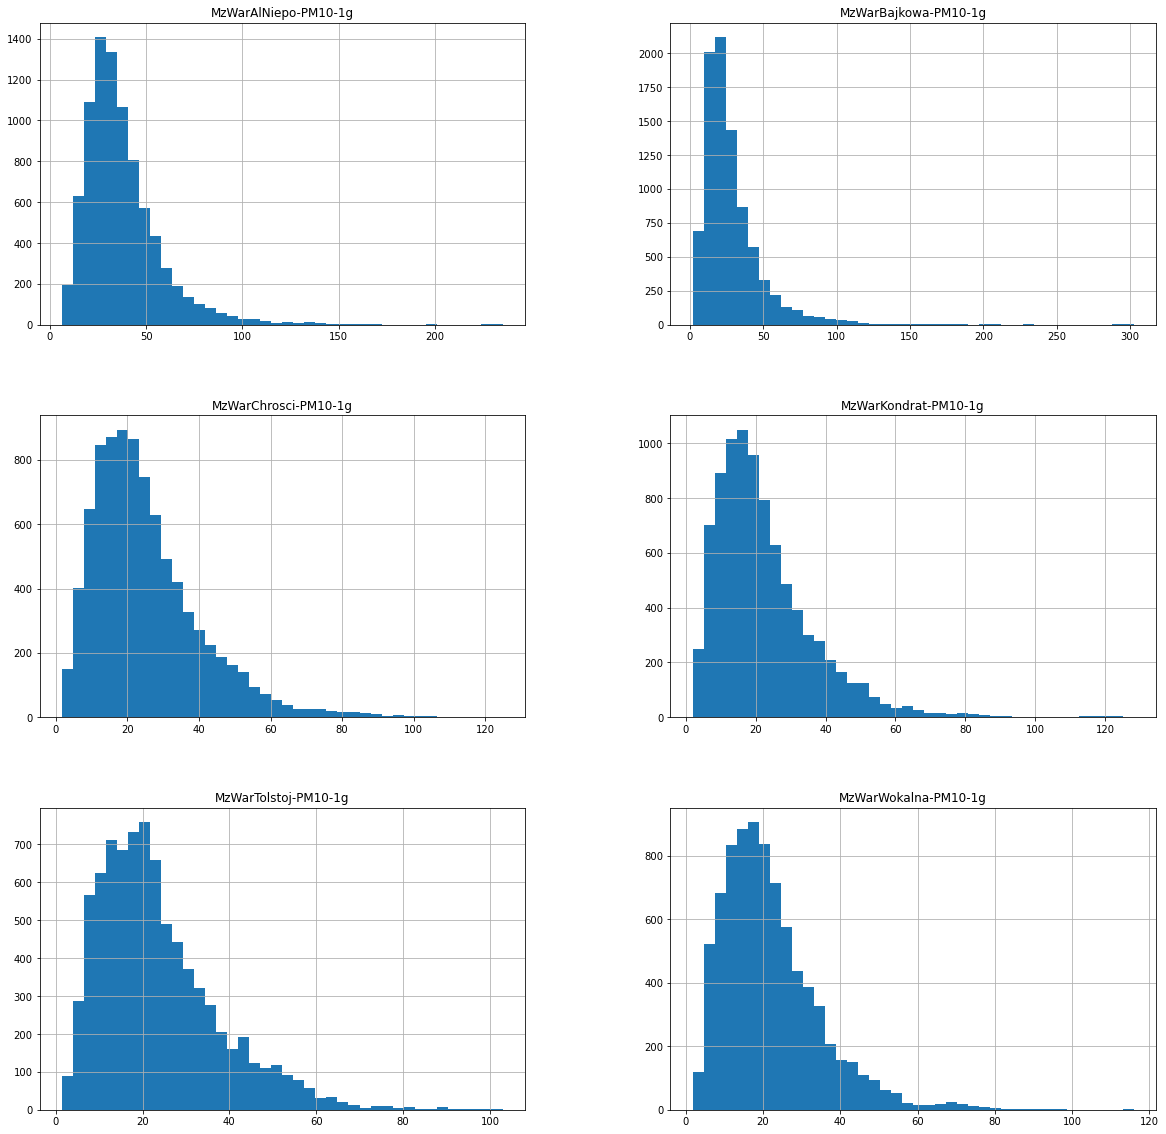

In [61]:
pm10_2019.hist(bins=40, figsize=(20, 20)) #skwed data

MzWarAlNiepo-PM10-1g


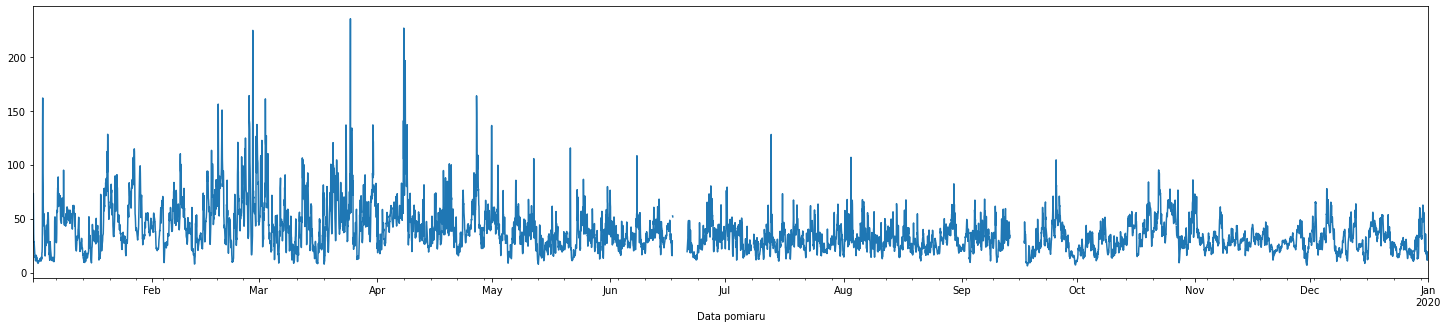

MzWarBajkowa-PM10-1g


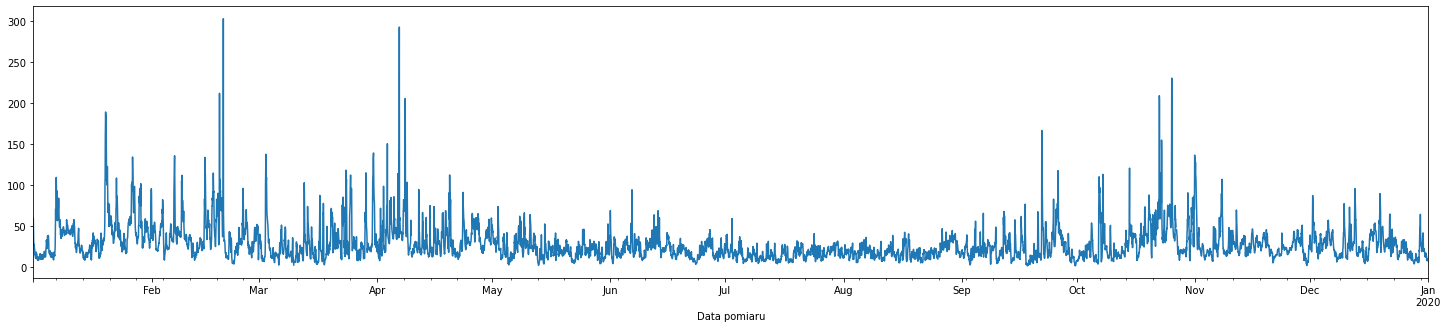

MzWarChrosci-PM10-1g


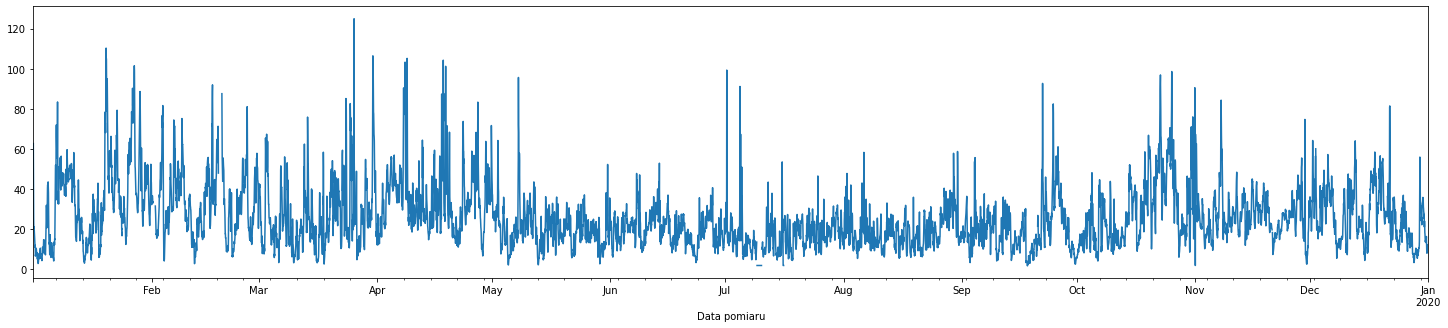

MzWarKondrat-PM10-1g


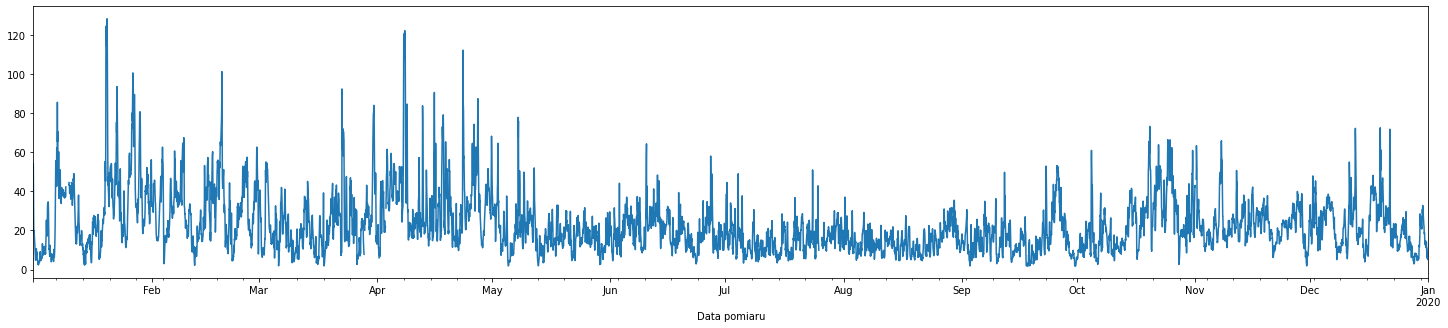

MzWarTolstoj-PM10-1g


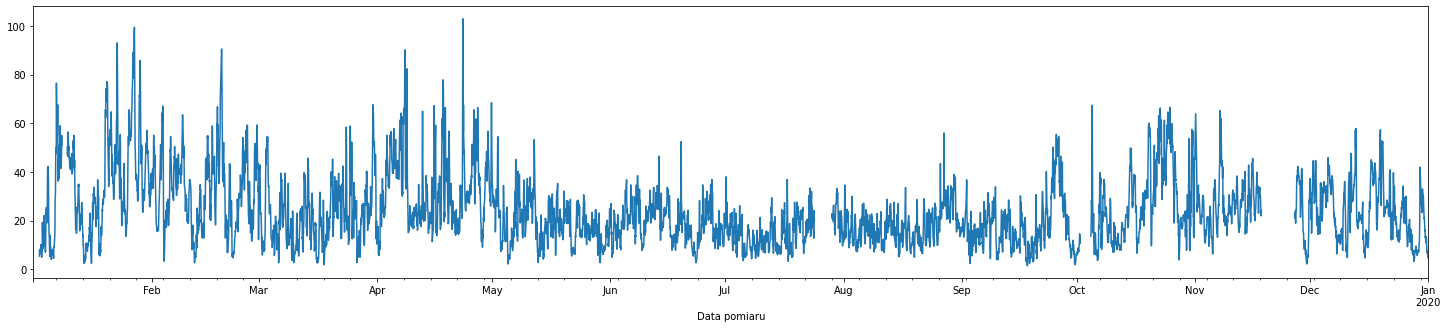

MzWarWokalna-PM10-1g


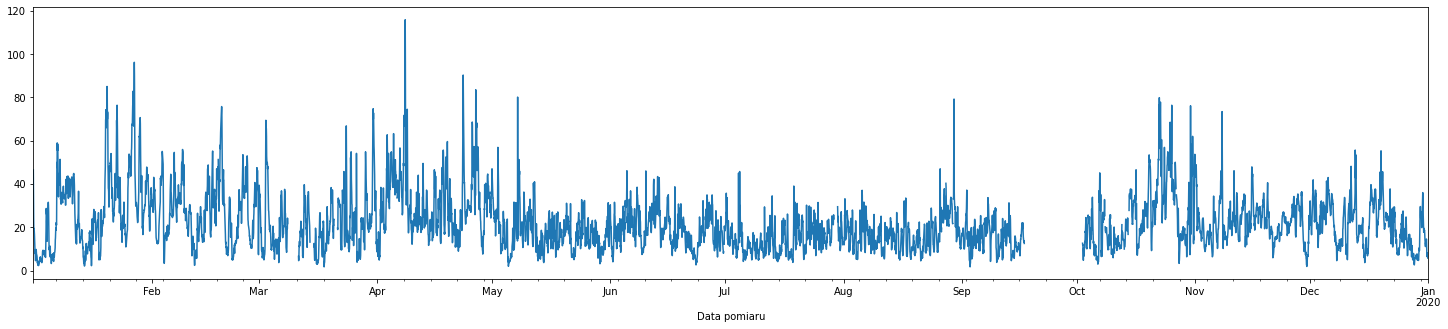

In [65]:
for c in pm10_2019:
    print(c)
    pm10_2019[c].plot(figsize=(25,5))
    plt.show()

In [17]:
pm10_2019.isna().sum()

MzWarAlNiepo-PM10-1g    205
MzWarBajkowa-PM10-1g     27
MzWarChrosci-PM10-1g     49
MzWarKondrat-PM10-1g     51
MzWarTolstoj-PM10-1g    454
MzWarWokalna-PM10-1g    548
dtype: int64

In [18]:
pm10_2019.interpolate(method='time').isna().sum()

MzWarAlNiepo-PM10-1g     0
MzWarBajkowa-PM10-1g     0
MzWarChrosci-PM10-1g     0
MzWarKondrat-PM10-1g     0
MzWarTolstoj-PM10-1g    38
MzWarWokalna-PM10-1g     0
dtype: int64

In [19]:
pm10_2019.interpolate(method='time').describe()

,MzWarAlNiepo-PM10-1g,MzWarBajkowa-PM10-1g,MzWarChrosci-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g
count,8760.000000,8760.000000,8760.000000,8760.000000,8722.000000,8760.000000
mean,37.209795,27.887477,25.343169,22.513084,23.590139,21.417420
std,19.509900,20.310140,15.287505,14.586573,13.793801,12.499375
min,6.182532,1.928624,1.618200,1.926238,1.390000,1.797239
25%,24.459842,15.128772,14.473900,12.456877,13.540000,12.633921
50%,33.027081,22.574885,22.115400,19.259855,20.998182,18.760751
75%,45.113204,34.169695,32.458395,28.672196,30.140000,27.153226
max,235.288624,302.378028,124.961000,128.200706,102.960000,115.899178


In [20]:
pm10_2019_interpolate = pm10_2019.interpolate(method='time')

In [21]:
pm10_2019_interpolate[pm10_2019_interpolate.isna().any(axis=1)].index

DatetimeIndex(['2019-01-01 01:00:00', '2019-01-01 02:00:00',
               '2019-01-01 03:00:00', '2019-01-01 04:00:00',
               '2019-01-01 05:00:00', '2019-01-01 06:00:00',
               '2019-01-01 07:00:00', '2019-01-01 08:00:00',
               '2019-01-01 09:00:00', '2019-01-01 10:00:00',
               '2019-01-01 11:00:00', '2019-01-01 12:00:00',
               '2019-01-01 13:00:00', '2019-01-01 14:00:00',
               '2019-01-01 15:00:00', '2019-01-01 16:00:00',
               '2019-01-01 17:00:00', '2019-01-01 18:00:00',
               '2019-01-01 19:00:00', '2019-01-01 20:00:00',
               '2019-01-01 21:00:00', '2019-01-01 22:00:00',
               '2019-01-01 23:00:00', '2019-01-02 00:00:00',
               '2019-01-02 01:00:00', '2019-01-02 02:00:00',
               '2019-01-02 03:00:00', '2019-01-02 04:00:00',
               '2019-01-02 05:00:00', '2019-01-02 06:00:00',
               '2019-01-02 07:00:00', '2019-01-02 08:00:00',
               '2019-01-

In [22]:
(pd.date_range('2019-01-01 01:00:00', periods=38, freq='H') == \
pm10_2019_interpolate[pm10_2019_interpolate.isna().any(axis=1)].index).mean()
# first 38h of MzWarTolstoj-PM10-1g is missing

1.0

MzWarAlNiepo-PM10-1g


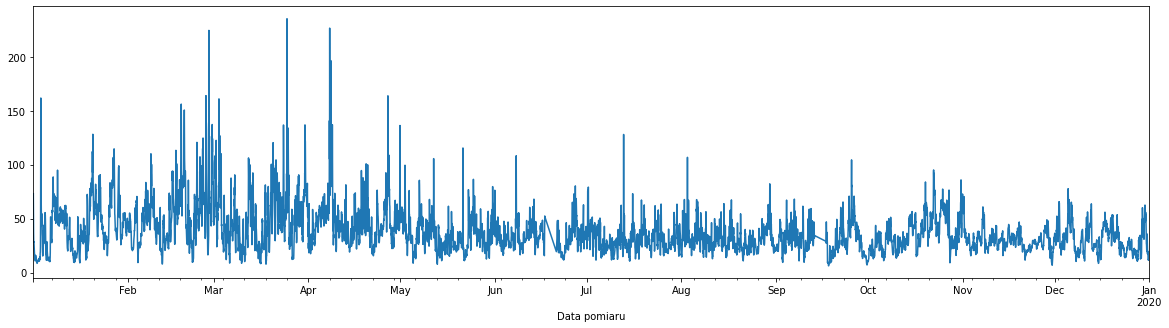

MzWarBajkowa-PM10-1g


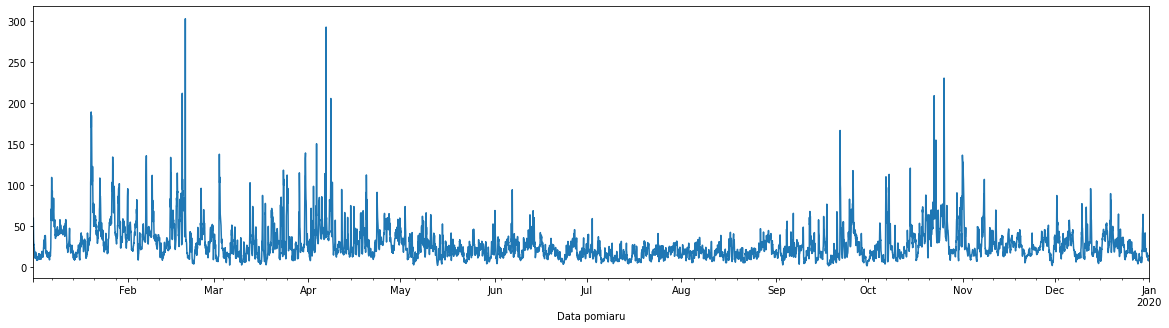

MzWarChrosci-PM10-1g


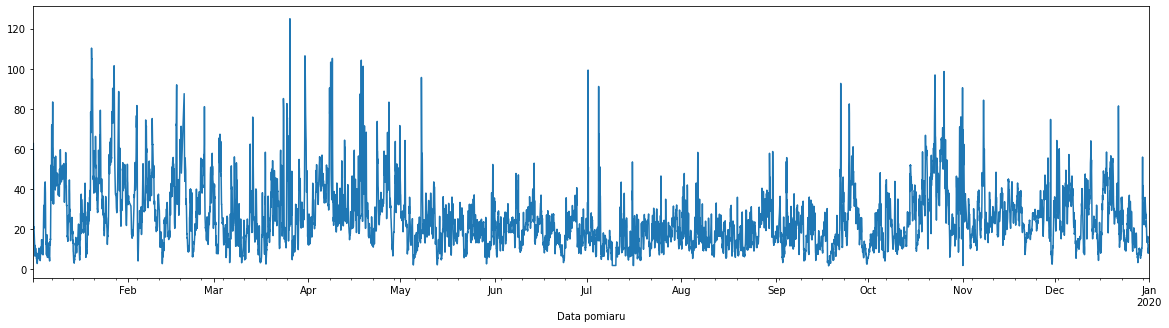

MzWarKondrat-PM10-1g


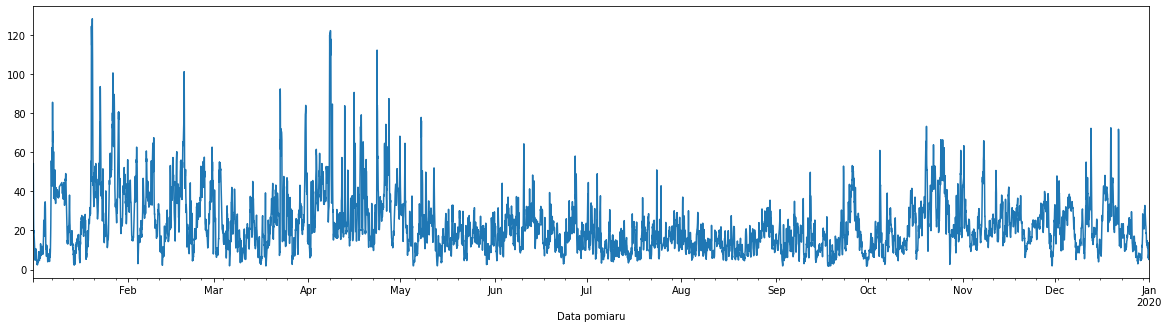

MzWarTolstoj-PM10-1g


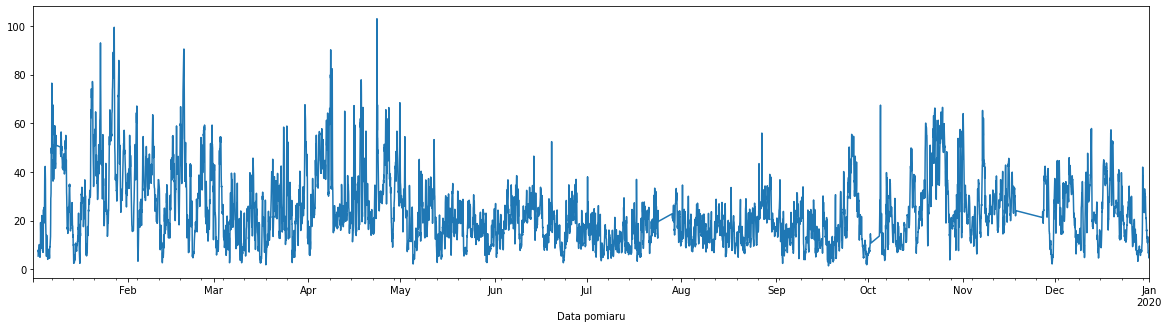

MzWarWokalna-PM10-1g


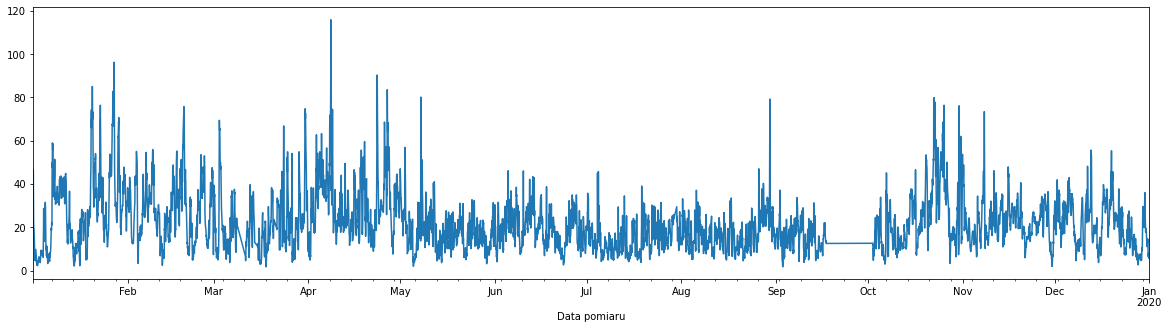

In [64]:
for c in pm10_2019_interpolate:
    print(c)
    pm10_2019_interpolate[c].plot(figsize=(20,5))
    plt.show()

# 2018

In [41]:
pd.read_excel('../data/gios/2018_PM10_1g.xlsx').head(10)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126
0,NaN,DsDzialoszyn,DsDziePilsud,DsJelGorOgin,DsKlodzSzkol,DsLadekMOB,DsLegAlRzecz,DsLubanMOB,DsNowRudSreb,DsOlawZolnAK,DsWalbrzWyso,DsWrocWybCon,DsZabkPowWar,KpBydPlPozna,KpBydWarszaw,KpGrudPilsud,KpInowSolank,KpToruDziewu,KpToruKaszow,KpToruStorczMOB,KpToruWSikor,KpWloclOkrze,LbLubObywate,LbZamoHrubie,LdGajewUjWod,LdLodzCzerni,LdLodzGdansk,LdLodzJanPaw,LdPabiKonsta,LdPioTrKraPr,LdRadomsRoln,LdZgieMielcz,LuGorzKosGdy,LuSulecDudka,LuWsKaziWiel,LuZarySzyman,LuZielKrotka,MpKrakAlKras,MpKrakBujaka,MpKrakBulwar,MpKrakDietla,MpKrakOsPias,MpKrakTelime,MpKrakWadow,MpKrakZloRog,MpNoSaczNadb,MpNoTargPSlo,MpOlkuFrNull,MpSkawOsOgro,MpSuchaNiesz,MpTarBitStud,MpTarRoSitko,MpTrzebOsZWM,MpZakopaSien,MzKonJezMos,MzOtwoBrzozo,MzPlocMiReja,MzRadTochter,MzSiedKonars,MzWarAlNiepo,MzWarKondrat,MzWarTolstoj,MzWarWokalna,MzZyraRoosev,OpKKozBSmial,OpOlesSlowac,OpOpoleKoszy,OpZdziePiast,PdAugustoZdrMOB,PdBialWarsza,PdLomSikorsk,PkJasloSikor,PkMielBierna,PkNiskoSzkla,PkPrzemGrunw,PkRymZdrPark,PkRzeszRejta,PmGdaKacze02,PmGdaLeczk08,PmGdaPoWie01,PmGdaWyzwo03,PmGdyPoreb04,PmGdySzaf09N,PmGdyWendy10,PmKosTargo12,PmLebMalcz16,PmMalMicki15,PmSlupKniazi,PmSopBitPl06,SkKielJagiel,SkKielTargow,SkKonsGranatMOB,SkMaloSlonec,SkNowiParkow,SkPolaRuszcz,SlBielKossak,SlCiesMickie,SlCzestoArmK,SlCzestoBacz,SlDabro1000L,SlGliwicMewy,SlKatoKossut,SlLublSzymal,SlRybniBorki,SlSosnoLubel,SlTychyTolst,SlUstronSana,SlWodzGalczy,SlZabSkloCur,SlZlotPotLes,SlZywieKoper,WmElbBazynsk,WmElkStadion,WmGoldJacwie,WmOlsPuszkin,WmOstrPilsud,WpBoroDrapal,WpKaliSawick,WpKoniWyszyn,WpKozieosLes,WpPilaKusoci,WpPoznDabrow,WpPoznPolank,ZpKoszArKraj,ZpSzczAndr01,ZpSzczecPrze,ZpSzczLacz04
1,NaN,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10
2,NaN,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
3,NaN,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
4,Czas pomiaru,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsLadekMOB-PM10-1g,DsLegAlRzecz-PM10-1g,DsLubanMOB-PM10-1g,DsNow

In [42]:
pm10_2018 = pd.read_excel('../data/gios/2018_PM10_1g.xlsx', header=5, index_col=0)
pm10_2018

,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsLadekMOB-PM10-1g,DsLegAlRzecz-PM10-1g,DsLubanMOB-PM10-1g,DsNowRudSreb-PM10-1g,DsOlawZolnAK-PM10-1g,DsWalbrzWyso-PM10-1g,DsWrocWybCon-PM10-1g,DsZabkPowWar-PM10-1g,KpBydPlPozna-PM10-1g,KpBydWarszaw-PM10-1g,KpGrudPilsud-PM10-1g,KpInowSolank-PM10-1g,KpToruDziewu-PM10-1g,KpToruKaszow-PM10-1g,KpToruStorczMOB-PM10-1g,KpToruWSikor-PM10-1g,KpWloclOkrze-PM10-1g,LbLubObywate-PM10-1g,LbZamoHrubie-PM10-1g,LdGajewUjWod-PM10-1g,LdLodzCzerni-PM10-1g,LdLodzGdansk-PM10-1g,LdLodzJanPaw-PM10-1g,LdPabiKonsta-PM10-1g,LdPioTrKraPr-PM10-1g,LdRadomsRoln-PM10-1g,LdZgieMielcz-PM10-1g,LuGorzKosGdy-PM10-1g,LuSulecDudka-PM10-1g,LuWsKaziWiel-PM10-1g,LuZarySzyman-PM10-1g,LuZielKrotka-PM10-1g,MpKrakAlKras-PM10-1g,MpKrakBujaka-PM10-1g,MpKrakBulwar-PM10-1g,MpKrakDietla-PM10-1g,MpKrakOsPias-PM10-1g,MpKrakTelime-PM10-1g,MpKrakWadow-PM10-1g,MpKrakZloRog-PM10-1g,MpNoSaczNadb-PM10-1g,MpNoTargPSlo-PM10-1g,MpOlkuFrNull-PM10-1g,MpSkawOsOgro-PM10-1g,MpSuchaNiesz-PM10-1g,MpTarBitStud-PM10-1g,MpTarRoSitko-PM10-1g,MpTrzebOsZWM-PM10-1g,MpZakopaSien-PM10-1g,MzKonJezMos-PM10-1g,MzOtwoBrzozo-PM10-1g,MzPlocMiReja-PM10-1g,MzRadTochter-PM10-1g,MzSiedKonars-PM10-1g,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g,MzZyraRoosev-PM10-1g,OpKKozBSmial-PM10-1g,OpOlesSlowac-PM10-1g,OpOpoleKoszy-PM10-1g,OpZdziePiast-PM10-1g,PdAugustoZdrMOB-PM10-1g,PdBialWarsza-PM10-1g,PdLomSikorsk-PM10-1g,PkJasloSikor-PM10-1g,PkMielBierna-PM10-1g,PkNiskoSzkla-PM10-1g,PkPrzemGrunw-PM10-1g,PkRymZdrPark-PM10-1g,PkRzeszRejta-PM10-1g,PmGdaKacze02-PM10-1g,PmGdaLeczk08-PM10-1g,PmGdaPoWie01-PM10-1g,PmGdaWyzwo03-PM10-1g,PmGdyPoreb04-PM10-1g,PmGdySzaf09N-PM10-1g,PmGdyWendy10-PM10-1g,PmKosTargo12-PM10-1g,PmLebMalcz16-PM10-1g,PmMalMicki15-PM10-1g,PmSlupKniazi-PM10-1g,PmSopBitPl06-PM10-1g,SkKielJagiel-PM10-1g,SkKielTargow-PM10-1g,SkKonsGranatMOB-PM10-1g,SkMaloSlonec-PM10-1g,SkNowiParkow-PM10-1g,SkPolaRuszcz-PM10-1g,SlBielKossak-PM10-1g,SlCiesMickie-PM10-1g,SlCzestoArmK-PM10-1g,SlCzestoBacz-PM10-1g,SlDabro1000L-PM10-1g,SlGliwicMewy-PM10-1g,SlKatoKossut-PM10-1g,SlLublSzymal-PM10-1g,SlRybniBorki-PM10-1g,SlSosnoLubel-PM10-1g,SlTychyTolst-PM10-1g,SlUstronSana-PM10-1g,SlWodzGalczy-PM10-1g,SlZabSkloCur-PM10-1g,SlZlotPotLes-PM10-1g,SlZywieKoper-PM10-1g,WmElbBazynsk-PM10-1g,WmElkStadion-PM10-1g,WmGoldJacwie-PM10-1g,WmOlsPuszkin-PM10-1g,WmOstrPilsud-PM10-1g,WpBoroDrapal-PM10-1g,WpKaliSawick-PM10-1g,WpKoniWyszyn-PM10-1g,WpKozieosLes-PM10-1g,WpPilaKusoci-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznPolank-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczLacz04-PM10-1g
Czas pomiaru,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,"20,3","7,6677","43,8925","133,86",NaN,"23,5187",NaN,"63,9445",NaN,"8,49835","70,2096","25,545",NaN,"73,3474","43,9","14,1768","47,6156","62,1",NaN,"63,1","43,4951","40,9","41,3","26,0","80,0","58,195","19,083","41,561","58,264","19,046","100,37","51,8373","32,6172","20,2247","44,7033","33,5716","59,0589",NaN,"163,369","115,384","225,213","65,7993","36,3942","293,804","181,148","95,4599","28,6891","50,8524","137,471","31,8724","23,4586","67,5688","403,547","41,250269","146,42","36,810694","87,884161","92,028885","60,302232","117,73181","89,71","88,66","40,27838","25,4633","18,5786","21,6271","50,4017","15,7","33,1","48,5","16,53","24,7633","16,6543","15,6617","15,9474","13,8647","41,7469","95,9831","131,33",NaN,"64,8332","30,4472","71,2833","170,326","78,258","43,94","18,8475","20,6635","26,0",NaN,NaN,"29,23","20,57","25,5","23,5761","38,4976","71,0937","60,2816","63,4578","64,5325","122,531",NaN,"18,8547","54,5011","21,376","25,168","77,134","83,3165","30,1093","47,6886","82,6642","28,3106","16,9653","45,9985","47,2772","12,4215","35,872",NaN,"32,4526","26,8099","21,9038","30,128","37,4186","28,3564","44,5816","19,4714"
2018-01-01 02:00:00,"29,29","6,2681","8,63003","38,7

In [43]:
pm10_2018.shape

(8760, 126)

In [67]:
pm10_2018.index.freq = 'H'

In [66]:
pm10_2018.index

DatetimeIndex(['2018-01-01 01:00:00', '2018-01-01 02:00:00',
               '2018-01-01 03:00:00', '2018-01-01 04:00:00',
               '2018-01-01 05:00:00', '2018-01-01 06:00:00',
               '2018-01-01 07:00:00', '2018-01-01 08:00:00',
               '2018-01-01 09:00:00', '2018-01-01 10:00:00',
               ...
               '2018-12-31 15:00:00', '2018-12-31 16:00:00',
               '2018-12-31 17:00:00', '2018-12-31 18:00:00',
               '2018-12-31 19:00:00', '2018-12-31 20:00:00',
               '2018-12-31 21:00:00', '2018-12-31 22:00:00',
               '2018-12-31 23:00:00', '2019-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Czas pomiaru', length=8760, freq='H')

In [44]:
index_mz_2018 = pm10_2018.columns.str.count('MzWar') > 0 #only stations in Warsaw

In [45]:
pm10_2018 = pm10_2018.iloc[:, index_mz_2018]
pm10_2018

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g
Czas pomiaru,,,,
2018-01-01 01:00:00,"60,302232","117,73181","89,71","88,66"
2018-01-01 02:00:00,"39,993304","36,057921","26,64","41,4"
2018-01-01 03:00:00,"34,437946","24,05336","23,33","31,91"
2018-01-01 04:00:00,"32,070089","22,55279","22,19","29,68"
2018-01-01 05:00:00,"30,430804","21,909689","19,14","26,37"
...,...,...,...,...
2018-12-31 20:00:00,"29,975446","30,698742",NaN,"21,85"
2018-12-31 21:00:00,"28,245089","19,337283",NaN,"19,53"
2018-12-31 22:00:00,"27,061161","17,086428",NaN,"25,75"


In [46]:
pm10_2019.columns

Index(['MzWarAlNiepo-PM10-1g', 'MzWarBajkowa-PM10-1g', 'MzWarChrosci-PM10-1g',
       'MzWarKondrat-PM10-1g', 'MzWarTolstoj-PM10-1g', 'MzWarWokalna-PM10-1g'],
      dtype='object')

In [47]:
pm10_2018.columns

Index(['MzWarAlNiepo-PM10-1g', 'MzWarKondrat-PM10-1g', 'MzWarTolstoj-PM10-1g',
       'MzWarWokalna-PM10-1g'],
      dtype='object')

In [48]:
#those two stations were built in 2018, date of first measurment: 2019-01-01 (no pre-2019 data)
set(pm10_2019.columns) - set(pm10_2018.columns)

{'MzWarBajkowa-PM10-1g', 'MzWarChrosci-PM10-1g'}

In [49]:
pm10_2018.info() # not float?

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MzWarAlNiepo-PM10-1g  8460 non-null   object
 1   MzWarKondrat-PM10-1g  8587 non-null   object
 2   MzWarTolstoj-PM10-1g  8251 non-null   object
 3   MzWarWokalna-PM10-1g  8529 non-null   object
dtypes: object(4)
memory usage: 342.2+ KB


In [50]:
pm10_2018.iloc[0, 0]

'60,302232'

In [52]:
type(pm10_2018.iloc[0, 0])

str

In [53]:
# not very good / optimal approach, but will do for that small dataset 
for c in pm10_2018.select_dtypes(include=[object]).columns:
    pm10_2018[c] = pm10_2018[c].replace(',', '.', regex=True).astype(float)

/home/bromberg/miniconda3/envs/PAQI/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
pm10_2018

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g
Czas pomiaru,,,,
2018-01-01 01:00:00,60.302232,117.731810,89.71,88.66
2018-01-01 02:00:00,39.993304,36.057921,26.64,41.40
2018-01-01 03:00:00,34.437946,24.053360,23.33,31.91
2018-01-01 04:00:00,32.070089,22.552790,22.19,29.68
2018-01-01 05:00:00,30.430804,21.909689,19.14,26.37
...,...,...,...,...
2018-12-31 20:00:00,29.975446,30.698742,NaN,21.85
2018-12-31 21:00:00,28.245089,19.337283,NaN,19.53
2018-12-31 22:00:00,27.061161,17.086428,NaN,25.75


In [55]:
pm10_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MzWarAlNiepo-PM10-1g  8460 non-null   float64
 1   MzWarKondrat-PM10-1g  8587 non-null   float64
 2   MzWarTolstoj-PM10-1g  8251 non-null   float64
 3   MzWarWokalna-PM10-1g  8529 non-null   float64
dtypes: float64(4)
memory usage: 342.2 KB


In [57]:
pm10_2018.isna().sum()

MzWarAlNiepo-PM10-1g    300
MzWarKondrat-PM10-1g    173
MzWarTolstoj-PM10-1g    509
MzWarWokalna-PM10-1g    231
dtype: int64

In [56]:
pm10_2018.describe()

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g
count,8460.000000,8587.000000,8251.000000,8529.000000
mean,42.876769,30.474881,30.186044,35.516836
std,24.747754,22.456971,19.564934,20.262252
min,4.020089,0.000000,0.990000,3.640000
25%,26.514732,15.693041,16.750000,21.650000
50%,37.352232,24.803645,25.690000,31.090000
75%,53.016518,38.415960,37.925000,43.790000
max,498.173661,334.135458,352.600000,313.500000


In [68]:
pm10_2018.interpolate(method='time').isna().sum()

MzWarAlNiepo-PM10-1g    0
MzWarKondrat-PM10-1g    0
MzWarTolstoj-PM10-1g    0
MzWarWokalna-PM10-1g    0
dtype: int64

In [69]:
pm10_2018.interpolate(method='time').describe()

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,42.779122,30.365670,30.050059,35.401539
std,24.470177,22.333319,19.409078,20.071763
min,4.020089,0.000000,0.990000,3.640000
25%,26.696875,15.585857,16.590000,21.730000
50%,37.625446,24.696462,25.630000,31.040000
75%,52.652232,38.308777,37.710873,43.590000
max,498.173661,334.135458,352.600000,313.500000


In [60]:
pm10_2018_interpolate = pm10_2018.interpolate(method='time')

In [74]:
pm10_2018_interpolate

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarTolstoj-PM10-1g,MzWarWokalna-PM10-1g
Czas pomiaru,,,,
2018-01-01 01:00:00,60.302232,117.731810,89.71,88.66
2018-01-01 02:00:00,39.993304,36.057921,26.64,41.40
2018-01-01 03:00:00,34.437946,24.053360,23.33,31.91
2018-01-01 04:00:00,32.070089,22.552790,22.19,29.68
2018-01-01 05:00:00,30.430804,21.909689,19.14,26.37
...,...,...,...,...
2018-12-31 20:00:00,29.975446,30.698742,4.93,21.85
2018-12-31 21:00:00,28.245089,19.337283,4.93,19.53
2018-12-31 22:00:00,27.061161,17.086428,4.93,25.75


# 2017

In [116]:
pd.read_excel('../data/gios/2017_PM10_1g.xlsx').head(10)

,Nr,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
0,Kod stacji,DsBoleslaMOB,DsDzialoszyn,DsDziePilsud,DsJelGorOgin,DsKlodzSzkol,DsKudowaMOB,DsLegAlRzecz,DsNowRudSreb,DsWalbrzWyso,DsWrocWybCon,DsZabkPowWar,KpBydPlPozna,KpBydWarszaw,KpGrudPilsud,KpInowSolank,KpToruDziewu,KpToruKaszow,KpToruWSikor,KpWloclChelmMOB,KpWloclOkrze,LbLubObywate,LbZamoHrubie,LdGajewUjWod,LdLodzCzerni,LdLodzGdansk,LdLodzJanPaw,LdLodzKilins,LdPabiKonsta,LdPioTrKraPr,LdRadomsRoln,LdZgieMielcz,LuGorzKosGdy,LuSulecDudka,LuWsKaziWiel,LuZarySzyman,LuZielKrotka,MpKrakAlKras,MpKrakBujaka,MpKrakBulwar,MpKrakDietla,MpKrakOsPias,MpKrakTelime,MpKrakWadow,MpKrakZloRog,MpNoSaczNadb,MpNoTargPSlo,MpOlkuFrNull,MpSkawOsOgro,MpTarBitStud,MpTarRoSitko,MpTrzebOsZWM,MpZakopaSien,MzKonJezMos,MzOtwoBrzozo,MzPlocMiReja,MzRadTochter,MzSiedKonars,MzWarAlNiepo,MzWarKondrat,MzWarMarszal,MzWarWokalna,MzZyraRoosev,OpKKozBSmial,OpOlesSlowac,OpOpoleKoszy,OpZdziePiast,PdAugustoZdrMOB,PdBialWarsza,PdLomSikorsk,PkJasloSikor,PkMielBierna,PkNiskoSzkla,PkPrzemGrunw,PkRymZdrPark,PkRzeszRejta,PmGdaKacze02,PmGdaLeczk08,PmGdaOstrz05,PmGdaPoWie01,PmGdaWyzwo03,PmGdyPoreb04,PmGdySzaf09N,PmGdyWendy10,PmKosTargo12,PmLebMalcz16,PmMalMicki15,PmSlupKniazi,PmSopBitPl06,SkKielJagiel,SkMalo11List,SkMaloSlonec,SkNowiParkow,SkPolaRuszcz,SlBielKossak,SlCiesMickie,SlCzestoArmK,SlCzestoBacz,SlDabro1000L,SlGliwicMewy,SlKatoKossut,SlRybniBorki,SlSosnoLubel,SlTychyTolst,SlUstronSana,SlWodzGalczy,SlZabSkloCur,SlZlotPotLes,SlZywieKoper,WmElbBazynsk,WmElkStadion,WmGoldJacwie,WmOlsPuszkin,WmOstrPilsud,WpBoroDrapal,WpKaliSawick,WpKoniWyszyn,WpPilaKusoci,WpPoznDabrow,WpPoznPolank,ZpKoszArKraj,ZpSzczAndr01,ZpSzczecPrze,ZpSzczLacz04
1,Wskaźnik,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10
2,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
3,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
4,Kod stanowiska,DsBoleslaMOB-PM10-1g,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsKudowaMOB-PM10-1g,DsLegAlRzecz-PM10-1g,DsNowRudSreb-PM10-1g,DsWalbrzWyso-PM10-1g,DsWrocWybCon-PM10-1g,DsZabkP

In [117]:
pm10_2017 = pd.read_excel('../data/gios/2017_PM10_1g.xlsx', header=5, index_col=0)
pm10_2017

,DsBoleslaMOB-PM10-1g,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsKudowaMOB-PM10-1g,DsLegAlRzecz-PM10-1g,DsNowRudSreb-PM10-1g,DsWalbrzWyso-PM10-1g,DsWrocWybCon-PM10-1g,DsZabkPowWar-PM10-1g,KpBydPlPozna-PM10-1g,KpBydWarszaw-PM10-1g,KpGrudPilsud-PM10-1g,KpInowSolank-PM10-1g,KpToruDziewu-PM10-1g,KpToruKaszow-PM10-1g,KpToruWSikor-PM10-1g,KpWloclChelmMOB-PM10-1g,KpWloclOkrze-PM10-1g,LbLubObywate-PM10-1g,LbZamoHrubie-PM10-1g,LdGajewUjWod-PM10-1g,LdLodzCzerni-PM10-1g,LdLodzGdansk-PM10-1g,LdLodzJanPaw-PM10-1g,LdLodzKilins-PM10-1g,LdPabiKonsta-PM10-1g,LdPioTrKraPr-PM10-1g,LdRadomsRoln-PM10-1g,LdZgieMielcz-PM10-1g,LuGorzKosGdy-PM10-1g,LuSulecDudka-PM10-1g,LuWsKaziWiel-PM10-1g,LuZarySzyman-PM10-1g,LuZielKrotka-PM10-1g,MpKrakAlKras-PM10-1g,MpKrakBujaka-PM10-1g,MpKrakBulwar-PM10-1g,MpKrakDietla-PM10-1g,MpKrakOsPias-PM10-1g,MpKrakTelime-PM10-1g,MpKrakWadow-PM10-1g,MpKrakZloRog-PM10-1g,MpNoSaczNadb-PM10-1g,MpNoTargPSlo-PM10-1g,MpOlkuFrNull-PM10-1g,MpSkawOsOgro-PM10-1g,MpTarBitStud-PM10-1g,MpTarRoSitko-PM10-1g,MpTrzebOsZWM-PM10-1g,MpZakopaSien-PM10-1g,MzKonJezMos-PM10-1g,MzOtwoBrzozo-PM10-1g,MzPlocMiReja-PM10-1g,MzRadTochter-PM10-1g,MzSiedKonars-PM10-1g,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarMarszal-PM10-1g,MzWarWokalna-PM10-1g,MzZyraRoosev-PM10-1g,OpKKozBSmial-PM10-1g,OpOlesSlowac-PM10-1g,OpOpoleKoszy-PM10-1g,OpZdziePiast-PM10-1g,PdAugustoZdrMOB-PM10-1g,PdBialWarsza-PM10-1g,PdLomSikorsk-PM10-1g,PkJasloSikor-PM10-1g,PkMielBierna-PM10-1g,PkNiskoSzkla-PM10-1g,PkPrzemGrunw-PM10-1g,PkRymZdrPark-PM10-1g,PkRzeszRejta-PM10-1g,PmGdaKacze02-PM10-1g,PmGdaLeczk08-PM10-1g,PmGdaOstrz05-PM10-1g,PmGdaPoWie01-PM10-1g,PmGdaWyzwo03-PM10-1g,PmGdyPoreb04-PM10-1g,PmGdySzaf09N-PM10-1g,PmGdyWendy10-PM10-1g,PmKosTargo12-PM10-1g,PmLebMalcz16-PM10-1g,PmMalMicki15-PM10-1g,PmSlupKniazi-PM10-1g,PmSopBitPl06-PM10-1g,SkKielJagiel-PM10-1g,SkMalo11List-PM10-1g,SkMaloSlonec-PM10-1g,SkNowiParkow-PM10-1g,SkPolaRuszcz-PM10-1g,SlBielKossak-PM10-1g,SlCiesMickie-PM10-1g,SlCzestoArmK-PM10-1g,SlCzestoBacz-PM10-1g,SlDabro1000L-PM10-1g,SlGliwicMewy-PM10-1g,SlKatoKossut-PM10-1g,SlRybniBorki-PM10-1g,SlSosnoLubel-PM10-1g,SlTychyTolst-PM10-1g,SlUstronSana-PM10-1g,SlWodzGalczy-PM10-1g,SlZabSkloCur-PM10-1g,SlZlotPotLes-PM10-1g,SlZywieKoper-PM10-1g,WmElbBazynsk-PM10-1g,WmElkStadion-PM10-1g,WmGoldJacwie-PM10-1g,WmOlsPuszkin-PM10-1g,WmOstrPilsud-PM10-1g,WpBoroDrapal-PM10-1g,WpKaliSawick-PM10-1g,WpKoniWyszyn-PM10-1g,WpPilaKusoci-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznPolank-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczLacz04-PM10-1g
Kod stanowiska,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 01:00:00,NaN,"53,3963","405,0","226,603","289,173",NaN,"80,1625","446,146","467,889","105,433","50,3375","71,7998","70,6458","43,4","23,6814","148,298165","121,1","35,3",NaN,NaN,"55,7","132,437","32,0",NaN,"53,256","29,083","67,48","97,44","84,24","139,15","65,0","118,871","48,2224","30,4881","115,193","69,9246","213,733","392,428","188,308","236,818","141,186","280,933",NaN,NaN,"430,315","394,895","63,8039","507,255","307,023","286,547","120,202","218,58",NaN,"85,668425","49,591231","64,40976","76,029523","70,912369","92,187643","68,36058","84,86","53,302091","182,344","101,07","124,557","193,234",NaN,"61,6","61,0","226,341","100,491","74,2846","32,4345","43,4591","54,0193","22,1","56,1414","17,2153","113,677","12,9501","30,6533","19,0778","23,1167",NaN,NaN,"52,0398","21,8495","23,0387","120,0","71,45",NaN,"134,74","101,55","204,036","77,9494",NaN,"144,617","311,242","385,046","172,316","56,9406","106,007","43,767",NaN,"97,5863","206,149","63,7734","239,245","77,4","45,9729",NaN,"66,8407",NaN,"23,4837","61,8409","18,53","62,105","33,2655","47,02","24,221","60,0293","20,2558","24,1928"
2017-01-01 02:00:00,NaN,"52,9082","310,984","229,432","265,72",NaN,"38,6769","473,629","144,374","96,0673","32,2515","53,2267","58,8918","56,6","23,5658","99,175

In [118]:
pm10_2017.index

DatetimeIndex(['2017-01-01 01:00:00', '2017-01-01 02:00:00',
               '2017-01-01 03:00:00', '2017-01-01 04:00:00',
               '2017-01-01 05:00:00', '2017-01-01 06:00:00',
               '2017-01-01 07:00:00', '2017-01-01 08:00:00',
               '2017-01-01 09:00:00', '2017-01-01 10:00:00',
               ...
               '2017-12-31 15:00:00', '2017-12-31 16:00:00',
               '2017-12-31 17:00:00', '2017-12-31 18:00:00',
               '2017-12-31 19:00:00', '2017-12-31 20:00:00',
               '2017-12-31 21:00:00', '2017-12-31 22:00:00',
               '2017-12-31 23:00:00', '2018-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Kod stanowiska', length=8760, freq=None)

In [119]:
pm10_2017.index.freq = 'H'

In [120]:
pm10_2017.index

DatetimeIndex(['2017-01-01 01:00:00', '2017-01-01 02:00:00',
               '2017-01-01 03:00:00', '2017-01-01 04:00:00',
               '2017-01-01 05:00:00', '2017-01-01 06:00:00',
               '2017-01-01 07:00:00', '2017-01-01 08:00:00',
               '2017-01-01 09:00:00', '2017-01-01 10:00:00',
               ...
               '2017-12-31 15:00:00', '2017-12-31 16:00:00',
               '2017-12-31 17:00:00', '2017-12-31 18:00:00',
               '2017-12-31 19:00:00', '2017-12-31 20:00:00',
               '2017-12-31 21:00:00', '2017-12-31 22:00:00',
               '2017-12-31 23:00:00', '2018-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Kod stanowiska', length=8760, freq='H')

In [121]:
index_mz_2017 = pm10_2017.columns.str.count('MzWar') > 0 # only stations in Warsaw

In [122]:
pm10_2017 = pm10_2017.iloc[:, index_mz_2017]
pm10_2017

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarMarszal-PM10-1g,MzWarWokalna-PM10-1g
Kod stanowiska,,,,
2017-01-01 01:00:00,"70,912369","92,187643","68,36058","84,86"
2017-01-01 02:00:00,"49,313293","92,698443","51,956218","46,62"
2017-01-01 03:00:00,"45,394474","57,351083","44,027444","43,87"
2017-01-01 04:00:00,"42,387007","46,522123","42,113601","43,46"
2017-01-01 05:00:00,"43,207225","42,435723","42,842684","42,24"
...,...,...,...,...
2017-12-31 20:00:00,"45,121068","39,83","45,85015","45,62"
2017-12-31 21:00:00,"50,042376","46,15","54,143466","47,3"
2017-12-31 22:00:00,"46,579233","44,48","49,860105","45,5"


In [123]:
pm10_2017.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 01:00:00 to 2018-01-01 00:00:00
Freq: H
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MzWarAlNiepo-PM10-1g  8698 non-null   object
 1   MzWarKondrat-PM10-1g  7462 non-null   object
 2   MzWarMarszal-PM10-1g  8591 non-null   object
 3   MzWarWokalna-PM10-1g  8571 non-null   object
dtypes: object(4)
memory usage: 342.2+ KB


In [124]:
for c in pm10_2017.select_dtypes(include=[object]).columns:
    pm10_2017[c] = pm10_2017[c].replace(',', '.', regex=True).astype(float)

/home/bromberg/miniconda3/envs/PAQI/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
pm10_2017

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarMarszal-PM10-1g,MzWarWokalna-PM10-1g
Kod stanowiska,,,,
2017-01-01 01:00:00,70.912369,92.187643,68.360580,84.86
2017-01-01 02:00:00,49.313293,92.698443,51.956218,46.62
2017-01-01 03:00:00,45.394474,57.351083,44.027444,43.87
2017-01-01 04:00:00,42.387007,46.522123,42.113601,43.46
2017-01-01 05:00:00,43.207225,42.435723,42.842684,42.24
...,...,...,...,...
2017-12-31 20:00:00,45.121068,39.830000,45.850150,45.62
2017-12-31 21:00:00,50.042376,46.150000,54.143466,47.30
2017-12-31 22:00:00,46.579233,44.480000,49.860105,45.50


In [126]:
pm10_2017.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 01:00:00 to 2018-01-01 00:00:00
Freq: H
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MzWarAlNiepo-PM10-1g  8698 non-null   float64
 1   MzWarKondrat-PM10-1g  7462 non-null   float64
 2   MzWarMarszal-PM10-1g  8591 non-null   float64
 3   MzWarWokalna-PM10-1g  8571 non-null   float64
dtypes: float64(4)
memory usage: 342.2 KB


In [127]:
pm10_2017.iloc[0,0]

70.912369

In [128]:
pm10_2017.describe()

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarMarszal-PM10-1g,MzWarWokalna-PM10-1g
count,8698.000000,7462.000000,8591.000000,8571.000000
mean,42.050620,33.572452,38.683883,31.681303
std,29.802770,29.207917,28.671616,21.505011
min,3.472217,0.100000,3.198811,4.050000
25%,23.795398,15.669803,20.970202,17.820000
50%,34.367097,25.477163,31.997579,26.440000
75%,50.680323,41.209803,46.579233,38.490000
max,383.962265,267.902843,399.273002,202.570000


In [129]:
pm10_2017.isna().sum() #a little bit more Nans

MzWarAlNiepo-PM10-1g      62
MzWarKondrat-PM10-1g    1298
MzWarMarszal-PM10-1g     169
MzWarWokalna-PM10-1g     189
dtype: int64

array([[<AxesSubplot:title={'center':'MzWarAlNiepo-PM10-1g'}>,
        <AxesSubplot:title={'center':'MzWarKondrat-PM10-1g'}>],
       [<AxesSubplot:title={'center':'MzWarMarszal-PM10-1g'}>,
        <AxesSubplot:title={'center':'MzWarWokalna-PM10-1g'}>]],
      dtype=object)

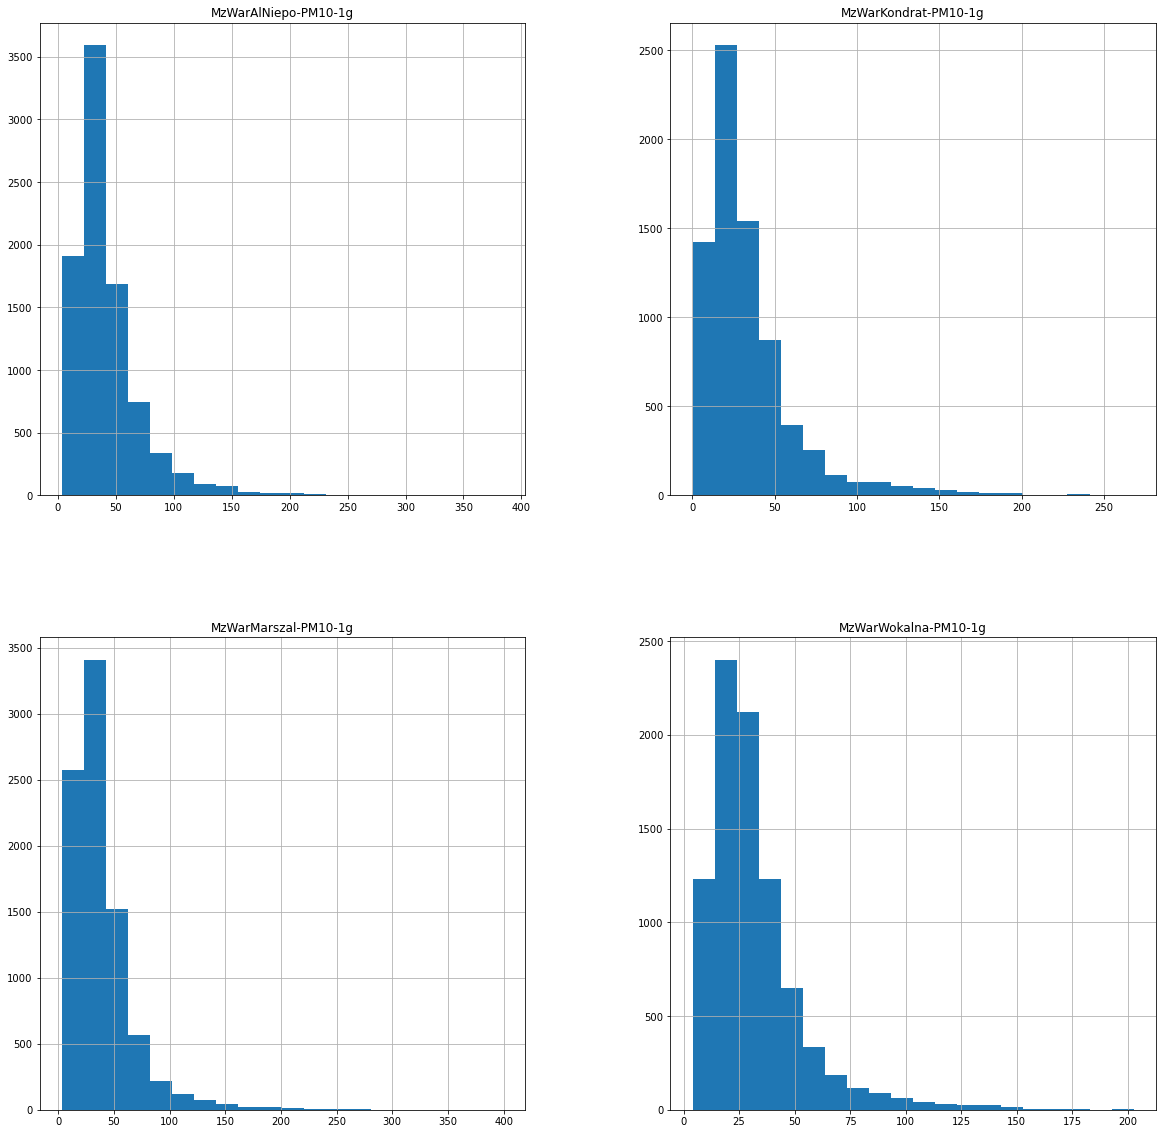

In [130]:
pm10_2017.hist(bins=20, figsize=(20,20))

In [131]:
pm10_2017.interpolate(method='time').isna().sum()

MzWarAlNiepo-PM10-1g    0
MzWarKondrat-PM10-1g    0
MzWarMarszal-PM10-1g    0
MzWarWokalna-PM10-1g    0
dtype: int64

In [132]:
pm10_2017.interpolate(method='time').describe()

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarMarszal-PM10-1g,MzWarWokalna-PM10-1g
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,41.986506,32.788399,38.515069,31.668181
std,29.718651,27.506180,28.469789,21.356377
min,3.472217,0.100000,3.198811,4.050000
25%,23.886533,15.885243,21.061338,17.887500
50%,34.275962,25.885803,31.815308,26.440000
75%,50.498053,40.699003,46.396962,38.580000
max,383.962265,267.902843,399.273002,202.570000


array([[<AxesSubplot:title={'center':'MzWarAlNiepo-PM10-1g'}>,
        <AxesSubplot:title={'center':'MzWarKondrat-PM10-1g'}>],
       [<AxesSubplot:title={'center':'MzWarMarszal-PM10-1g'}>,
        <AxesSubplot:title={'center':'MzWarWokalna-PM10-1g'}>]],
      dtype=object)

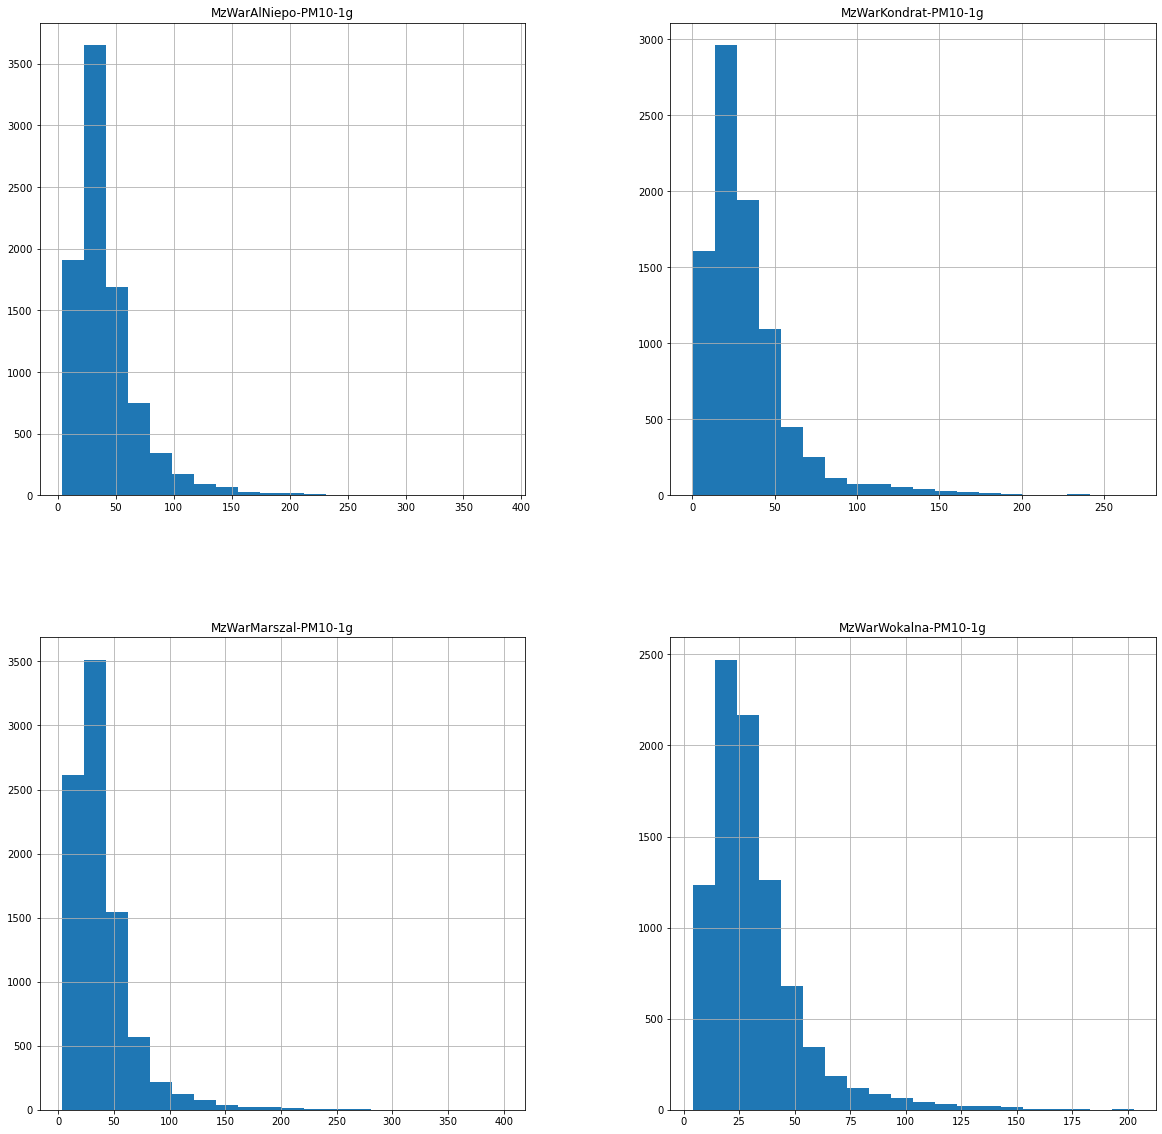

In [107]:
pm10_2017.interpolate(method='time').hist(bins=20, figsize=(20,20))

In [133]:
pm10_2017_interpolate = pm10_2017.interpolate(method='time')

# 2016

In [109]:
pd.read_excel('../data/gios/2016_PM10_1g.xlsx').head(10)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
0,NaN,DsDzialoszyn,DsDziePilsud,DsJelGorOgin,DsKlodzSzkol,DsLegAlRzecz,DsNowRudSreb,DsPolanSportMOB,DsSzkPor1MajMOB,DsWalbrzWyso,DsWrocWybCon,DsZabkPowWar,KpBydPlPozna,KpBydWarszaw,KpGrudPilsud,KpInowOsMatwMOB,KpInowSolank,KpToruDziewu,KpToruKaszow,KpToruWSikor,KpWiktorowoG,KpWloclOkrze,LbLubObywate,LdGajewUjWod,LdLodzCzerni,LdLodzGdansk,LdLodzJanPaw,LdLodzKilins,LdPabiKonsta,LdPioTrKraPr,LdRadomsRoln,LdZgieMielcz,LuGorzKosGdy,LuSulecDudka,LuWsKaziWiel,LuZarySzyman,LuZielKrotka,MpKrakAlKras,MpKrakBujaka,MpKrakBulwar,MpKrakDietla,MpKrakOsPias,MpKrakZloRog,MpNoSaczNadb,MpNoTargPSlo,MpOlkuFrNull,MpSkawOsOgro,MpTarBitStud,MpTarRoSitko,MpTrzebOsZWM,MpZakopaSien,MzPlocMiReja,MzRadTochter,MzSiedKonars,MzWarAlNiepo,MzWarKondrat,MzWarMarszal,MzWarWokalna,MzZyraRoosev,OpKKozBSmial,OpOlesSlowac,OpOpoleMinor,OpZdziePiast,PdBialWarsza,PdHajnowkJagMOB,PdLomSikorsk,PkJasloSikor,PkMielSolski,PkNiskoSzkla,PkPrzemGrunw,PkRzeszRejta,PmGdaKacze02,PmGdaLeczk08,PmGdaOstrz05,PmGdaPoWie01,PmGdaWyzwo03,PmGdyPoreb04,PmGdySzaf09N,PmKosTargo12,PmLebMalcz16,PmMalMicki15,PmSlupKniazi,PmSopBitPl06,PmStaGdaLubi,PmTczeTarg07,SkKielJagiel,SkMalo11List,SkNowiParkow,SkPolaRuszcz,SlBielKossak,SlCiesMickie,SlCzestoArmK,SlCzestoBacz,SlDabro1000L,SlGliwicMewy,SlKatoKossut,SlRybniBorki,SlSosnoLubel,SlTychyTolst,SlUstronSana,SlWodzGalczy,SlZabSkloCur,SlZlotPotLes,SlZywieKoper,WmElbBazynsk,WmGoldJacwie,WmMragParkow,WmOlsPuszkin,WmOstrChrobr,WpBoroDrapal,WpKaliSawick,WpKoniWyszyn,WpPilaKusoci,WpPoznDabrow,WpPoznPolank,ZpKoszArKraj,ZpSzczAndr01,ZpSzczecPrze,ZpSzczLacz04
1,NaN,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10
2,NaN,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
3,NaN,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
4,Czas pomiaru,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsLegAlRzecz-PM10-1g,DsNowRudSreb-PM10-1g,DsPolanSportMOB-PM10-1g,DsSzkPor1MajMOB-PM10-1g,DsWalbrzWyso-PM10-1g,DsWrocWybCon-PM10-1g,DsZabkPowWar-PM10-1g,KpBydPlPozna-PM10-1g,KpBydWarszaw-PM10-1g,KpGrudPilsud-PM10-1g,KpInowOsMatwMOB-PM10-1g,KpInowSolank-PM10-1g,KpToruDziewu-PM10-1g,KpToruKaszow-PM10-1g,

In [110]:
pm10_2016 = pd.read_excel('../data/gios/2016_PM10_1g.xlsx', header=5, index_col=0)

In [111]:
pm10_2016

,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsLegAlRzecz-PM10-1g,DsNowRudSreb-PM10-1g,DsPolanSportMOB-PM10-1g,DsSzkPor1MajMOB-PM10-1g,DsWalbrzWyso-PM10-1g,DsWrocWybCon-PM10-1g,DsZabkPowWar-PM10-1g,KpBydPlPozna-PM10-1g,KpBydWarszaw-PM10-1g,KpGrudPilsud-PM10-1g,KpInowOsMatwMOB-PM10-1g,KpInowSolank-PM10-1g,KpToruDziewu-PM10-1g,KpToruKaszow-PM10-1g,KpToruWSikor-PM10-1g,KpWiktorowoG-PM10-1g,KpWloclOkrze-PM10-1g,LbLubObywate-PM10-1g,LdGajewUjWod-PM10-1g,LdLodzCzerni-PM10-1g,LdLodzGdansk-PM10-1g,LdLodzJanPaw-PM10-1g,LdLodzKilins-PM10-1g,LdPabiKonsta-PM10-1g,LdPioTrKraPr-PM10-1g,LdRadomsRoln-PM10-1g,LdZgieMielcz-PM10-1g,LuGorzKosGdy-PM10-1g,LuSulecDudka-PM10-1g,LuWsKaziWiel-PM10-1g,LuZarySzyman-PM10-1g,LuZielKrotka-PM10-1g,MpKrakAlKras-PM10-1g,MpKrakBujaka-PM10-1g,MpKrakBulwar-PM10-1g,MpKrakDietla-PM10-1g,MpKrakOsPias-PM10-1g,MpKrakZloRog-PM10-1g,MpNoSaczNadb-PM10-1g,MpNoTargPSlo-PM10-1g,MpOlkuFrNull-PM10-1g,MpSkawOsOgro-PM10-1g,MpTarBitStud-PM10-1g,MpTarRoSitko-PM10-1g,MpTrzebOsZWM-PM10-1g,MpZakopaSien-PM10-1g,MzPlocMiReja-PM10-1g,MzRadTochter-PM10-1g,MzSiedKonars-PM10-1g,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarMarszal-PM10-1g,MzWarWokalna-PM10-1g,MzZyraRoosev-PM10-1g,OpKKozBSmial-PM10-1g,OpOlesSlowac-PM10-1g,OpOpoleMinor-PM10-1g,OpZdziePiast-PM10-1g,PdBialWarsza-PM10-1g,PdHajnowkJagMOB-PM10-1g,PdLomSikorsk-PM10-1g,PkJasloSikor-PM10-1g,PkMielSolski-PM10-1g,PkNiskoSzkla-PM10-1g,PkPrzemGrunw-PM10-1g,PkRzeszRejta-PM10-1g,PmGdaKacze02-PM10-1g,PmGdaLeczk08-PM10-1g,PmGdaOstrz05-PM10-1g,PmGdaPoWie01-PM10-1g,PmGdaWyzwo03-PM10-1g,PmGdyPoreb04-PM10-1g,PmGdySzaf09N-PM10-1g,PmKosTargo12-PM10-1g,PmLebMalcz16-PM10-1g,PmMalMicki15-PM10-1g,PmSlupKniazi-PM10-1g,PmSopBitPl06-PM10-1g,PmStaGdaLubi-PM10-1g,PmTczeTarg07-PM10-1g,SkKielJagiel-PM10-1g,SkMalo11List-PM10-1g,SkNowiParkow-PM10-1g,SkPolaRuszcz-PM10-1g,SlBielKossak-PM10-1g,SlCiesMickie-PM10-1g,SlCzestoArmK-PM10-1g,SlCzestoBacz-PM10-1g,SlDabro1000L-PM10-1g,SlGliwicMewy-PM10-1g,SlKatoKossut-PM10-1g,SlRybniBorki-PM10-1g,SlSosnoLubel-PM10-1g,SlTychyTolst-PM10-1g,SlUstronSana-PM10-1g,SlWodzGalczy-PM10-1g,SlZabSkloCur-PM10-1g,SlZlotPotLes-PM10-1g,SlZywieKoper-PM10-1g,WmElbBazynsk-PM10-1g,WmGoldJacwie-PM10-1g,WmMragParkow-PM10-1g,WmOlsPuszkin-PM10-1g,WmOstrChrobr-PM10-1g,WpBoroDrapal-PM10-1g,WpKaliSawick-PM10-1g,WpKoniWyszyn-PM10-1g,WpPilaKusoci-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznPolank-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczLacz04-PM10-1g
Czas pomiaru,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 01:00:00,"78,3245","127,545","21,0414","46,9293","248,856","341,22","89,0011",NaN,"20,6604","244,272","57,3108","258,6",NaN,NaN,NaN,"62,6361","89,181","84,9","64,7","50,8","105,5","252,5675","66,0",NaN,NaN,"77,0","159,27",NaN,"180,18","94,38",NaN,"206,214","35,7848","130,263","122,047","94,7359","303,558",NaN,"272,456","449,5",NaN,"342,924","232,611",NaN,NaN,NaN,"201,032","164,943","174,414",NaN,"96,100666","187,742266","107,479961","100,6892","129,835","137,2292","116,600014","137,909685","30,0106","27,3093","47,457","60,749","107,6","27,08","67,9","247,586","191,435","175,213","84,5894","106,535","33,5792","47,5562","51,7332","53,0594","33,8459","86,5637","32,6202",NaN,"50,0","37,05","41,6842","41,9953","140,0","89,1816","124,0","49,98","130,13","160,74","237,125","44,0596","191,715","206,636","445,363","152,662","233,745","78,4259","236,565","330,581","29,9489","211,911","171,489","49,821","94,2785","46,8006","65,4985","48,7431","75,5433","70,5319","95,8496","437,7","55,77","160,068","119,146","80,99","55,8317","116,134","60,3764","52,7901"
2016-01-01 02:00:00,"66,1195","150,669","27,9219","55,5095","180,971","200,201","80,1493",NaN,"25,4119","102,633","31,5006","282,1","209,9",NaN,NaN,"126,4147","79,293","74,1","80,1","52,3","104,8","446,216","65,0","81,152","158,5","184,0","127,81","103,04","183,69","87,12","130,0","116,727","35,4043","48,2

In [135]:
index_mz_2016 = pm10_2016.columns.str.count('MzWar') > 0 # only stations in Warsaw
index_mz_2016

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [140]:
pm10_2016 = pm10_2016.iloc[:, index_mz_2016]
pm10_2016

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarMarszal-PM10-1g,MzWarWokalna-PM10-1g
Czas pomiaru,,,,
2016-01-01 01:00:00,"100,6892","129,835","137,2292","116,600014"
2016-01-01 02:00:00,"101,7332","234,835","131,5916","91,400011"
2016-01-01 03:00:00,"97,1396","194,585","123,0308","92,600011"
2016-01-01 04:00:00,"72,71","126,71","86,804","76,700009"
2016-01-01 05:00:00,"61,5392","84,46","78,5564","67,300008"
...,...,...,...,...
2016-12-31 20:00:00,"50,3684","45,84","53,7092","47,000006"
2016-12-31 21:00:00,"52,6652","47,82","53,8136","42,800005"
2016-12-31 22:00:00,"56,1104","49,88","59,66","44,300005"


In [139]:
(8784 - 8760) # 2016 is a leap year ~ additional day 29.02

24

In [203]:
pm10_2016.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 01:00:00 to 2017-01-01 00:00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MzWarAlNiepo-PM10-1g  8591 non-null   object
 1   MzWarKondrat-PM10-1g  8139 non-null   object
 2   MzWarMarszal-PM10-1g  8644 non-null   object
 3   MzWarWokalna-PM10-1g  8693 non-null   object
dtypes: object(4)
memory usage: 343.1+ KB


In [211]:
for c in pm10_2016.select_dtypes(include=[object]).columns:
    pm10_2016[c] = pm10_2016[c].replace(',', '.', regex=True).astype(float)

/home/bromberg/miniconda3/envs/PAQI/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [212]:
pm10_2016

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarMarszal-PM10-1g,MzWarWokalna-PM10-1g
Czas pomiaru,,,,
2016-01-01 01:00:00,100.6892,129.835,137.2292,116.600014
2016-01-01 02:00:00,101.7332,234.835,131.5916,91.400011
2016-01-01 03:00:00,97.1396,194.585,123.0308,92.600011
2016-01-01 04:00:00,72.7100,126.710,86.8040,76.700009
2016-01-01 05:00:00,61.5392,84.460,78.5564,67.300008
...,...,...,...,...
2016-12-31 20:00:00,50.3684,45.840,53.7092,47.000006
2016-12-31 21:00:00,52.6652,47.820,53.8136,42.800005
2016-12-31 22:00:00,56.1104,49.880,59.6600,44.300005


In [213]:
pm10_2016.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 01:00:00 to 2017-01-01 00:00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MzWarAlNiepo-PM10-1g  8591 non-null   float64
 1   MzWarKondrat-PM10-1g  8139 non-null   float64
 2   MzWarMarszal-PM10-1g  8644 non-null   float64
 3   MzWarWokalna-PM10-1g  8693 non-null   float64
dtypes: float64(4)
memory usage: 343.1 KB


In [210]:
pm10_2016.isna().sum()

MzWarAlNiepo-PM10-1g    193
MzWarKondrat-PM10-1g    645
MzWarMarszal-PM10-1g    140
MzWarWokalna-PM10-1g     91
dtype: int64

In [209]:
pm10_2016.describe()

,MzWarAlNiepo-PM10-1g,MzWarKondrat-PM10-1g,MzWarMarszal-PM10-1g,MzWarWokalna-PM10-1g
count,8591,8139,8644,8693
unique,1057,4238,910,815
top,"33,56","27,798","30,8456","17,400002"
freq,37,11,36,45


# Combined

https://medium.com/@drnesr/filling-gaps-of-a-time-series-using-python-d4bfddd8c460

In our case (1h freq and equally spaced data) 'time' works the same as 'linear' method - https://stackoverflow.com/questions/54985896/pandas-interpolate-time-vs-linear

GIOŚ uses up previous measurements (up to 3 hours old) to fill missing data